# Experiments 13-15

### Dataset 1:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Dataset 2:
- **Dataset:** 3m | 60º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. small + mid
2. small
3. mid

In [1]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number = 5

# The folder you want to navigate to (relative to the root)
target_folder = f"docs/Experimentos/2 Finetuning/{experiment_number} set/runs/detect/"

### Init

In [2]:
scale: int = 500 # size for graphs (in pixels)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Current working directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Trabajo Final/Desarrollo/docs/Experimentos/2 Finetuning/5 set/runs/detect


In [5]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

#### Functions

In [6]:
def graph_training_metrics(df: pd.DataFrame, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()


        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [7]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [8]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

## Experiment 13 *(full dataset)*
### *3m | 60º+90º | small + mid*

In [9]:
folder = "train/"

In [10]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  673.462         1.83843         1.33453         1.37074   
96     97  679.638         1.81782         1.32551         1.34566   
97     98  686.796         1.79991         1.32942         1.35591   
98     99  693.123         1.81299         1.31321         1.34892   
99    100  699.733         1.80786         1.29337         1.33602   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.41209            0.33924           0.29084   
96               0.42720            0.33940           0.29832   
97               0.41389            0.33411           0.28886   
98               0.42446            0.33613           0.29413   
99               0.42700            0.33985           0.29699   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.09404       2.61510       1.77982       1.67887  0.000119   
96              0.09662       2.59056       1.77491       1.66405  0.000099   
97              0.09318       2.62092       1.78625       1.68176  0.000079   
98              0.09500       2.60383       1.77663       1.66463  0.000060   
99              0.09578       2.59915       1.77664       1.66437  0.000040   

      lr/pg1    lr/pg2  
95  0.000119  0.000119  
96  0.000099  0.000099  
97  0.000079  0.000079  
98  0.000060  0.000060  
99  0.000040  0.000040

***NOTE:***
- `lr/pg0` typically refers to the learning rate for the backbone weights.
- `lr/pg1` is usually associated with the learning rate for the YOLO layers' weights.
- `lr/pg2` often represents the learning rate for any additional parameters, such as biases.

In [11]:
last_row = df1.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 11.662 min


In [49]:
TP = 2348
FP = 2128
FN = 4081
base = TP+FP+FN
base

8557

In [50]:
TP/base, FP/base, FN/base

(0.2743952319738226, 0.24868528689961436, 0.47691948112656307)

### Graphs

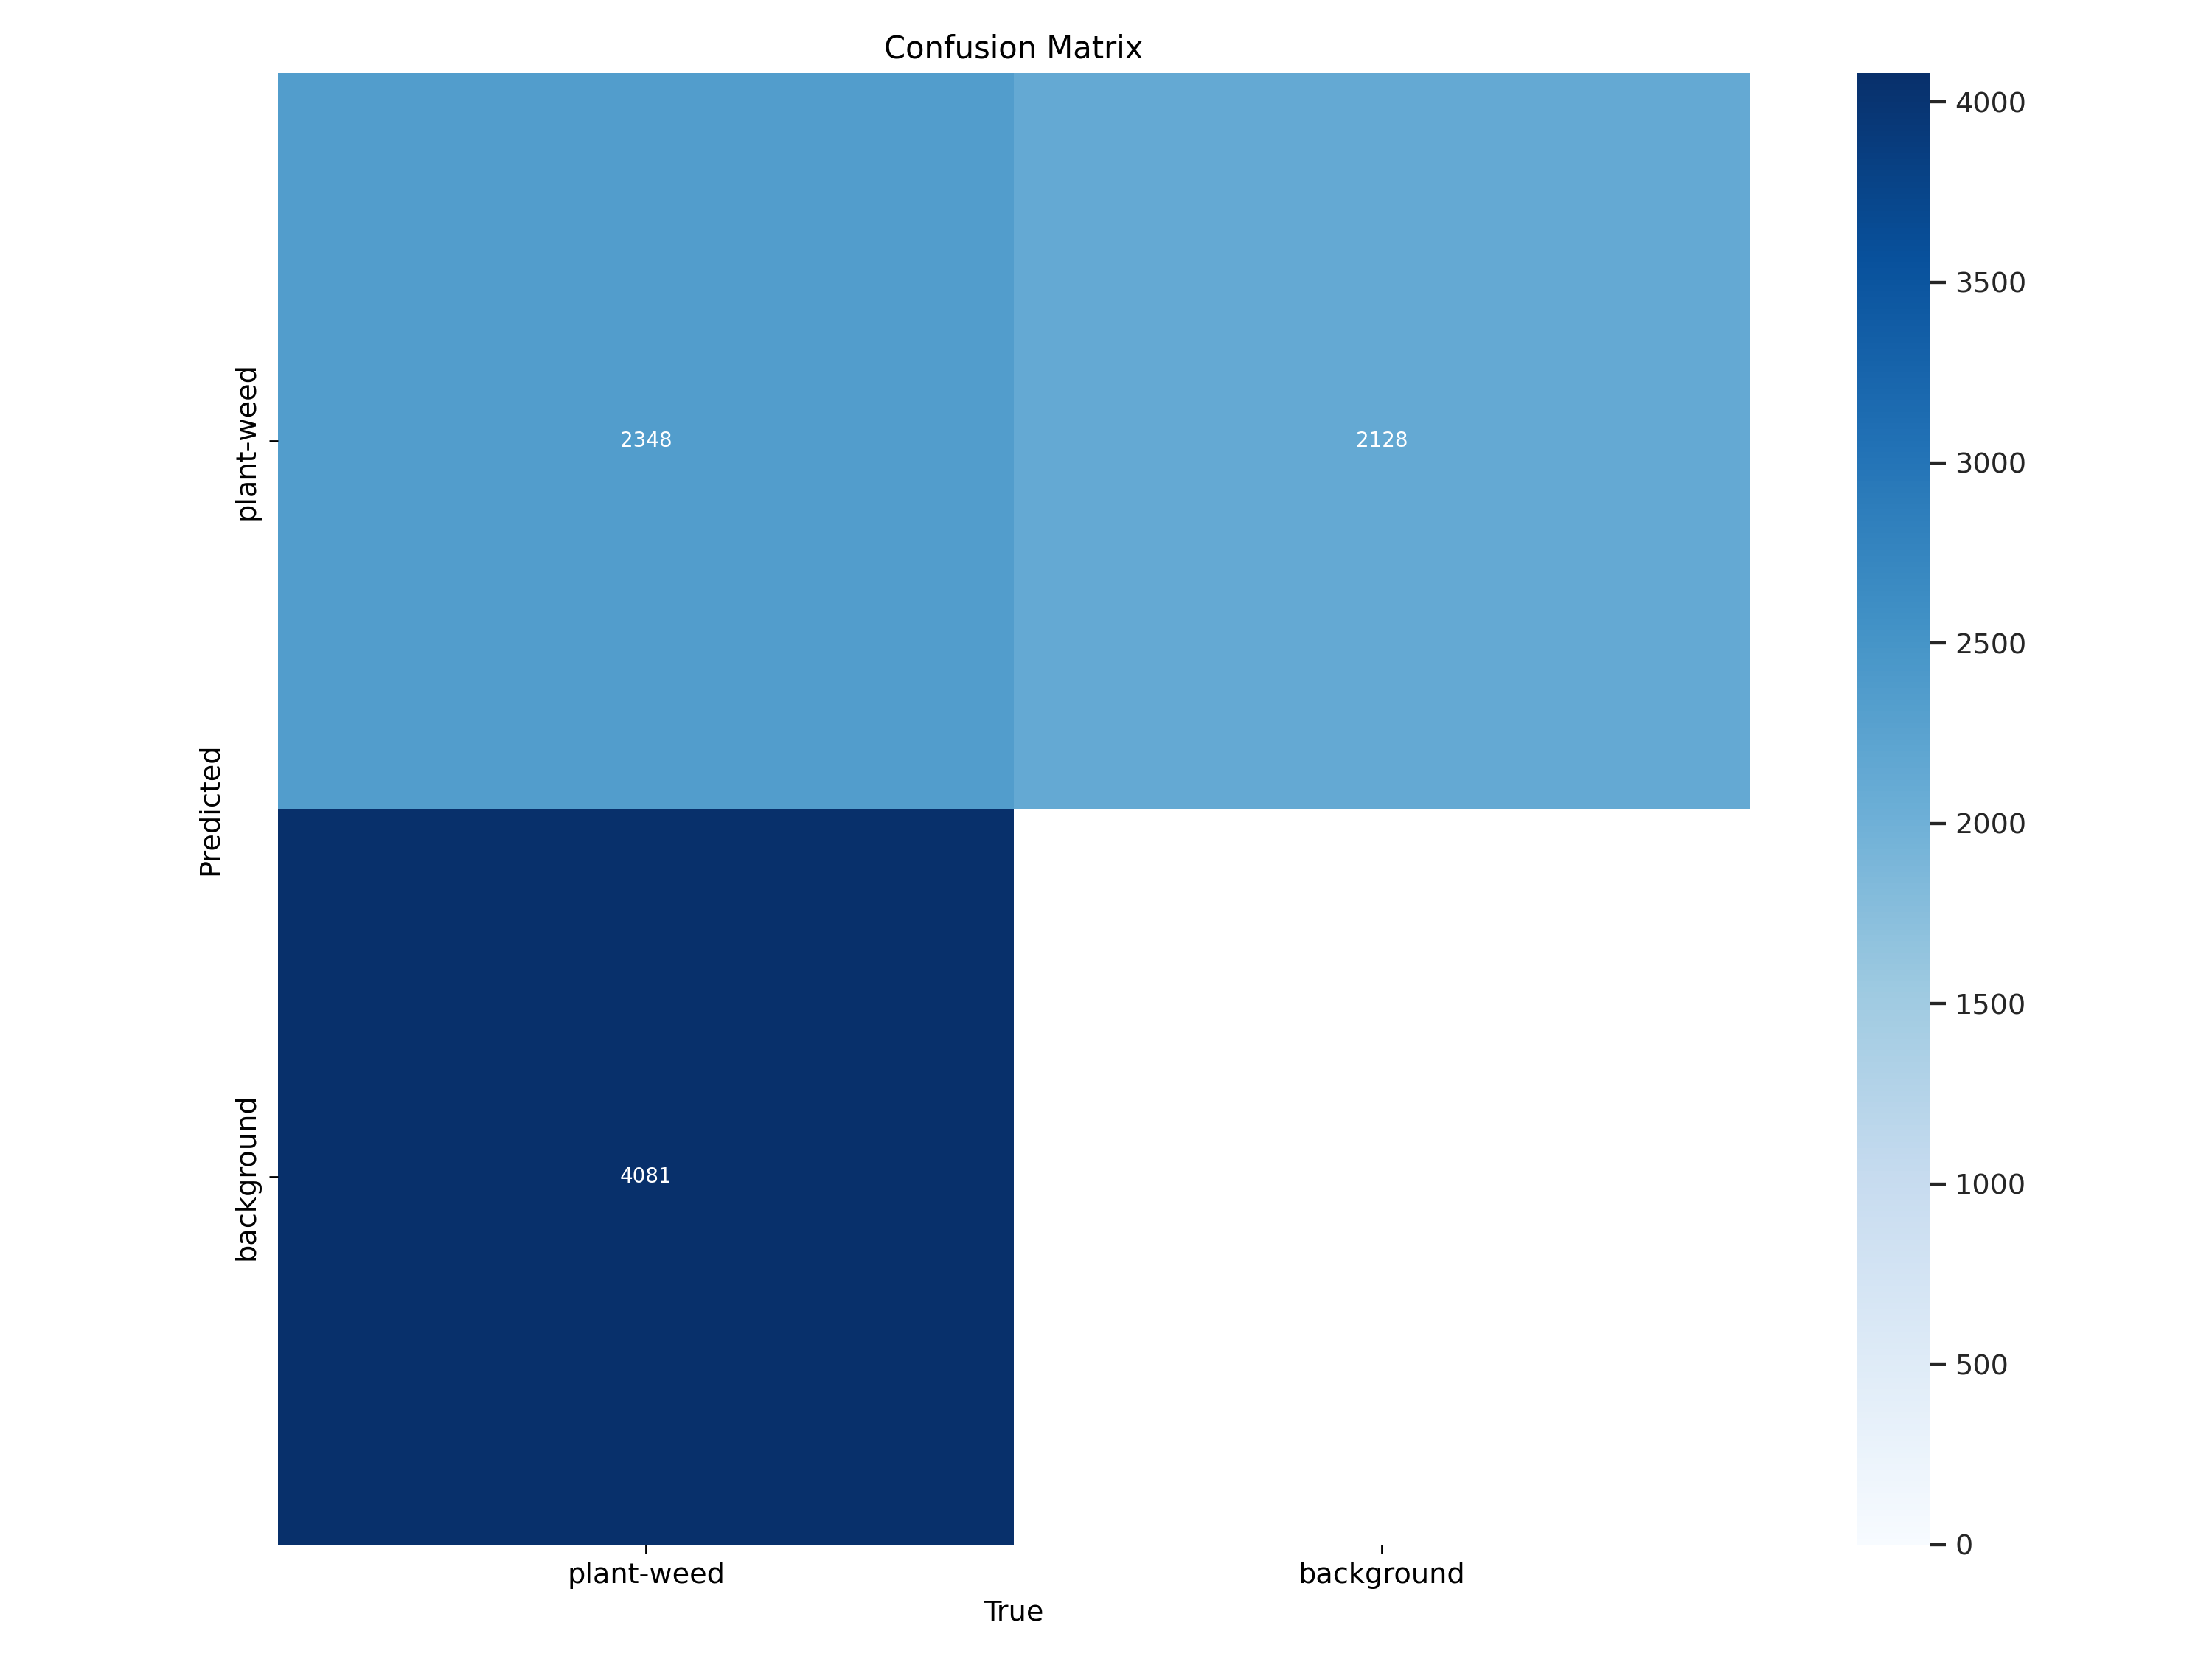

In [12]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

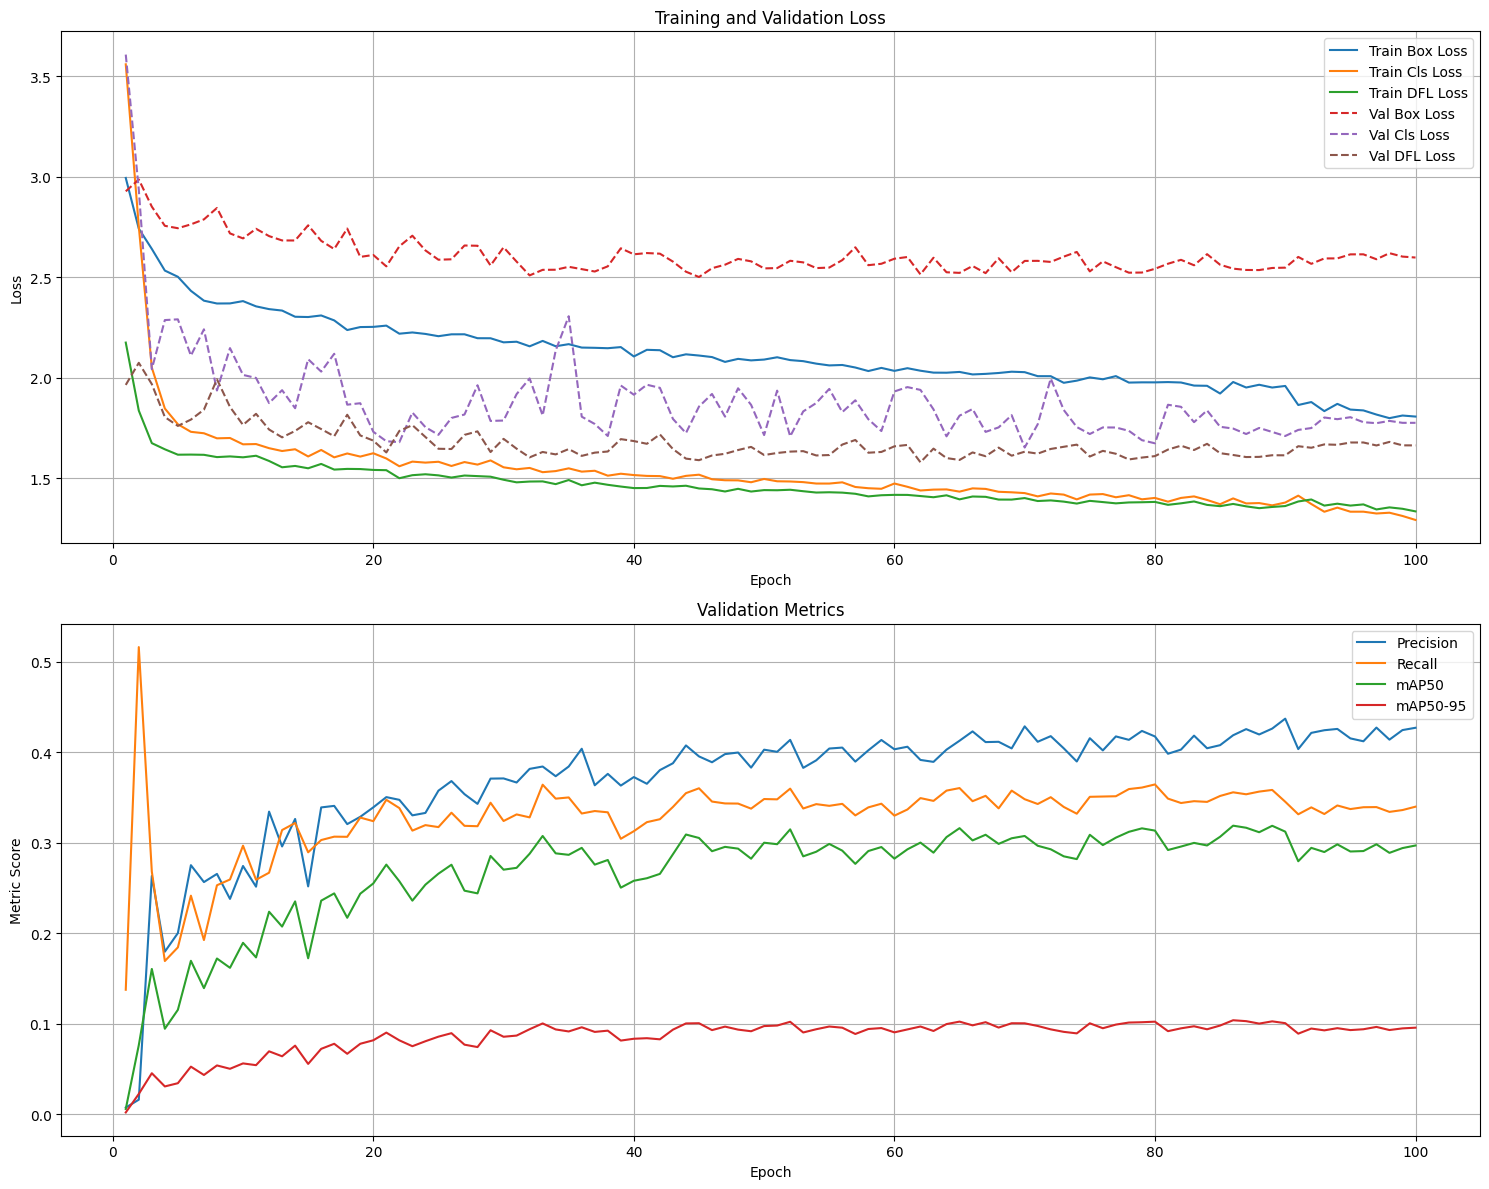

In [13]:
graph_training_metrics(df1, graph="full")

In [14]:
graph_LrLoss_3D(df1)

Validation set


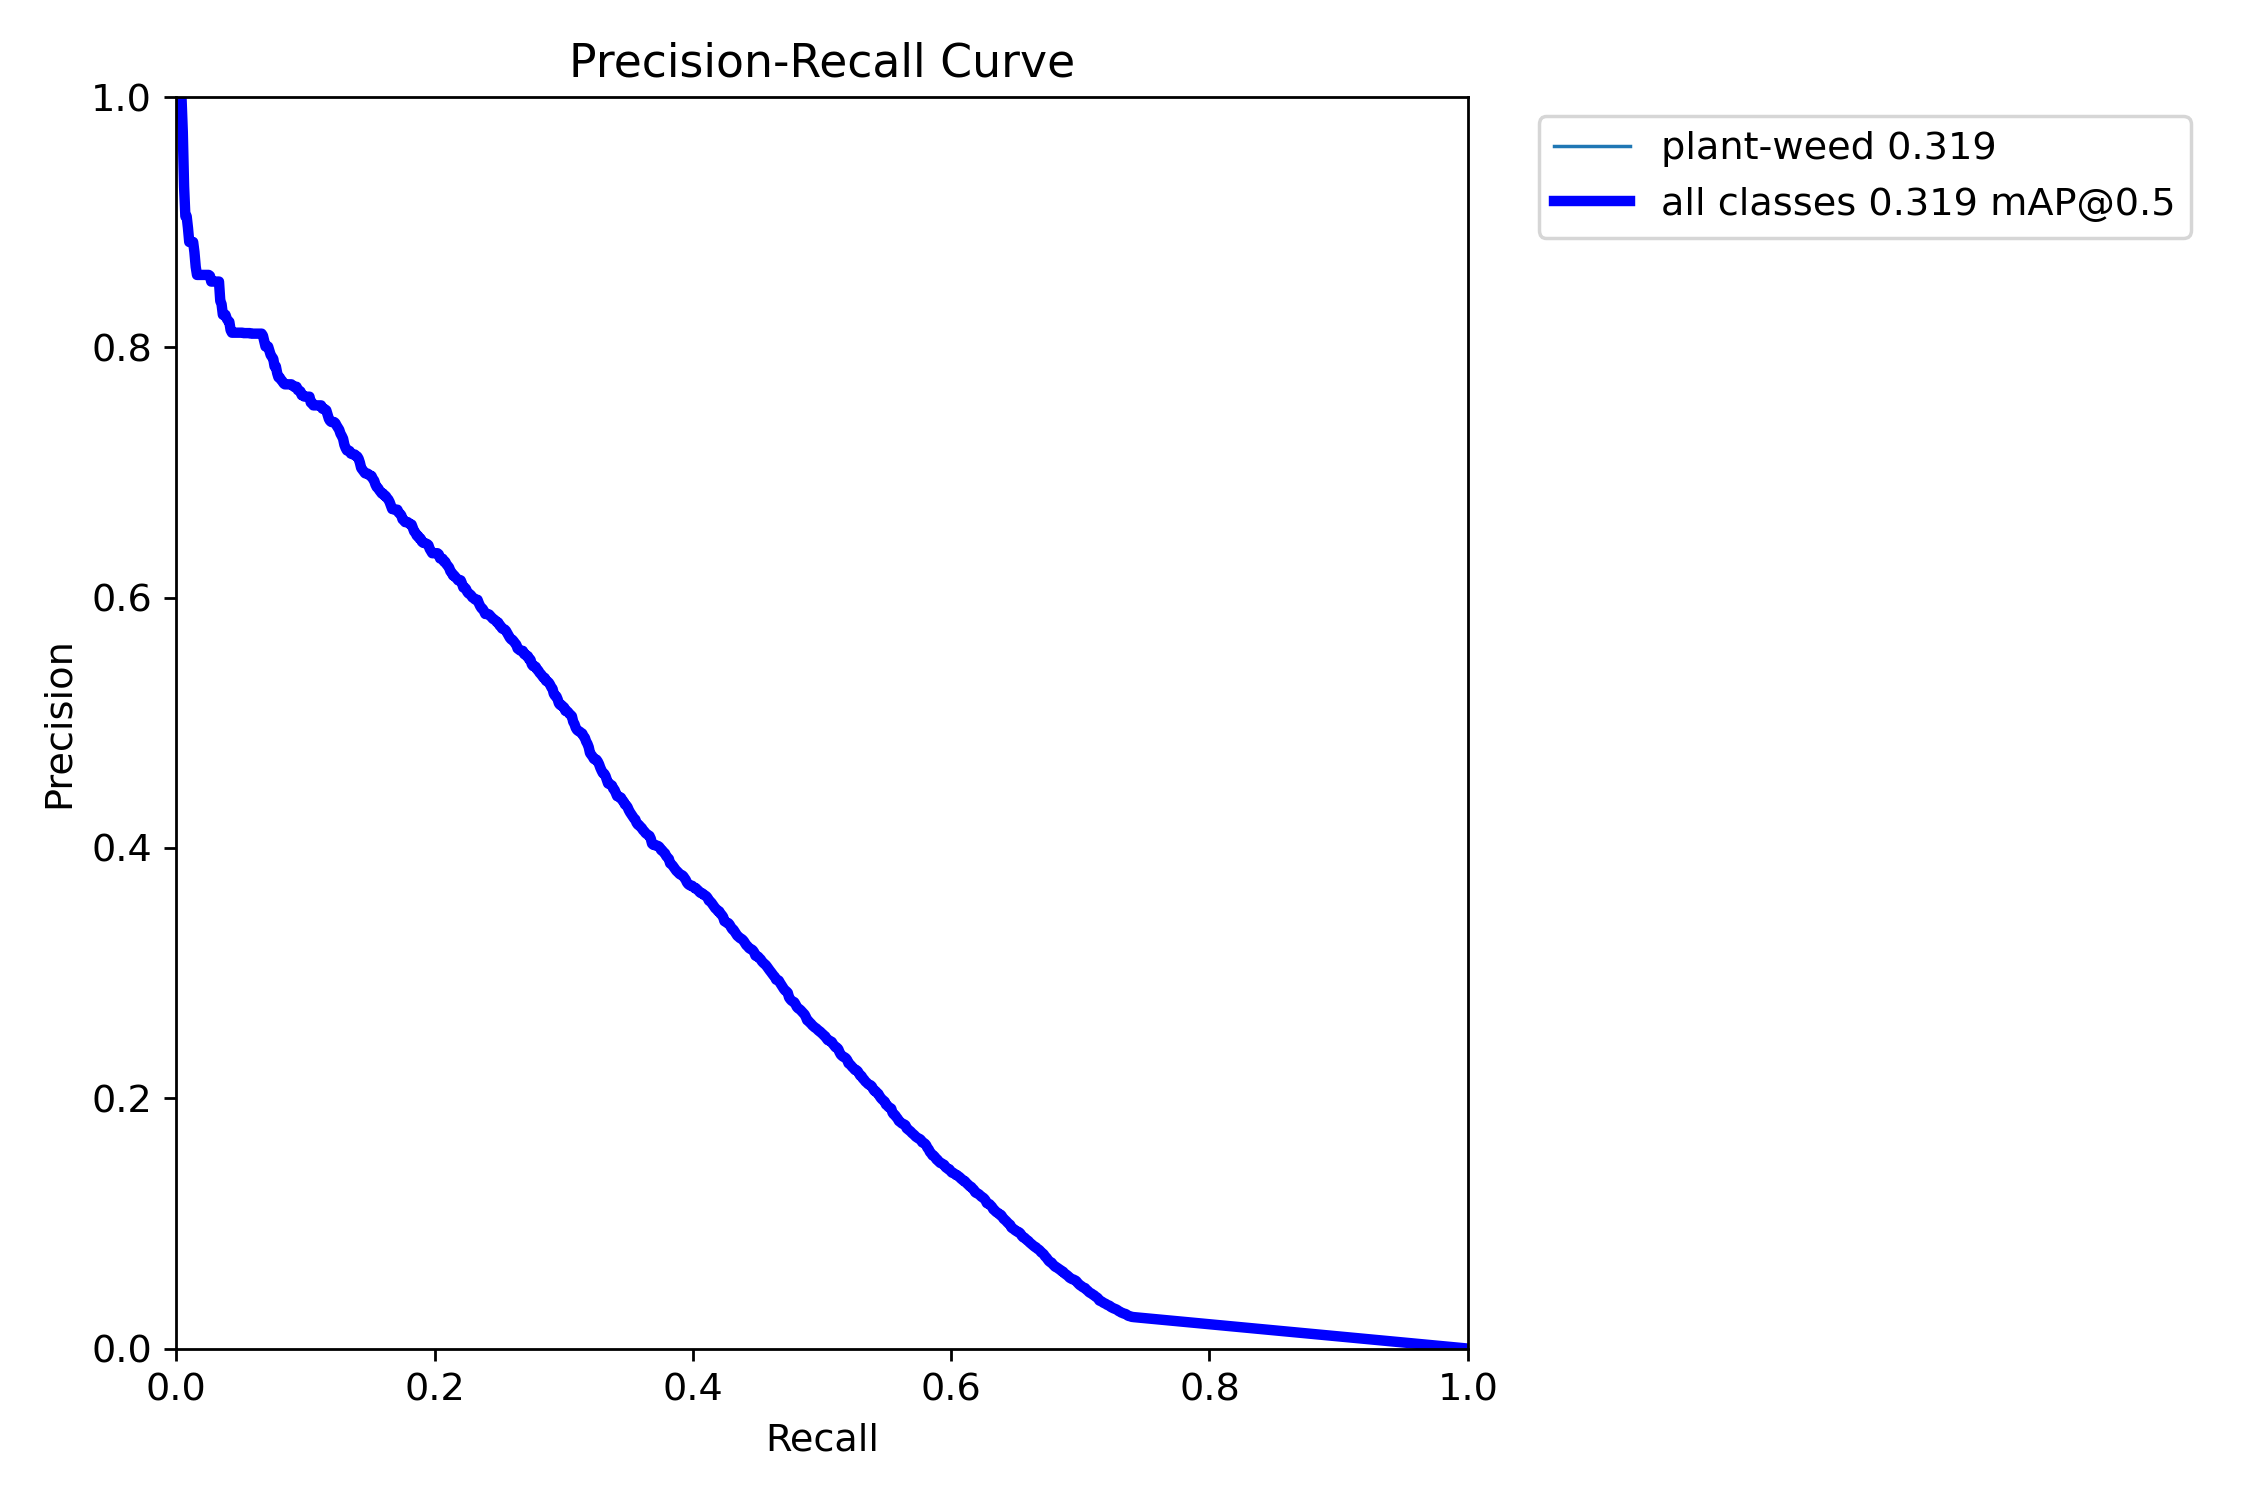

In [15]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

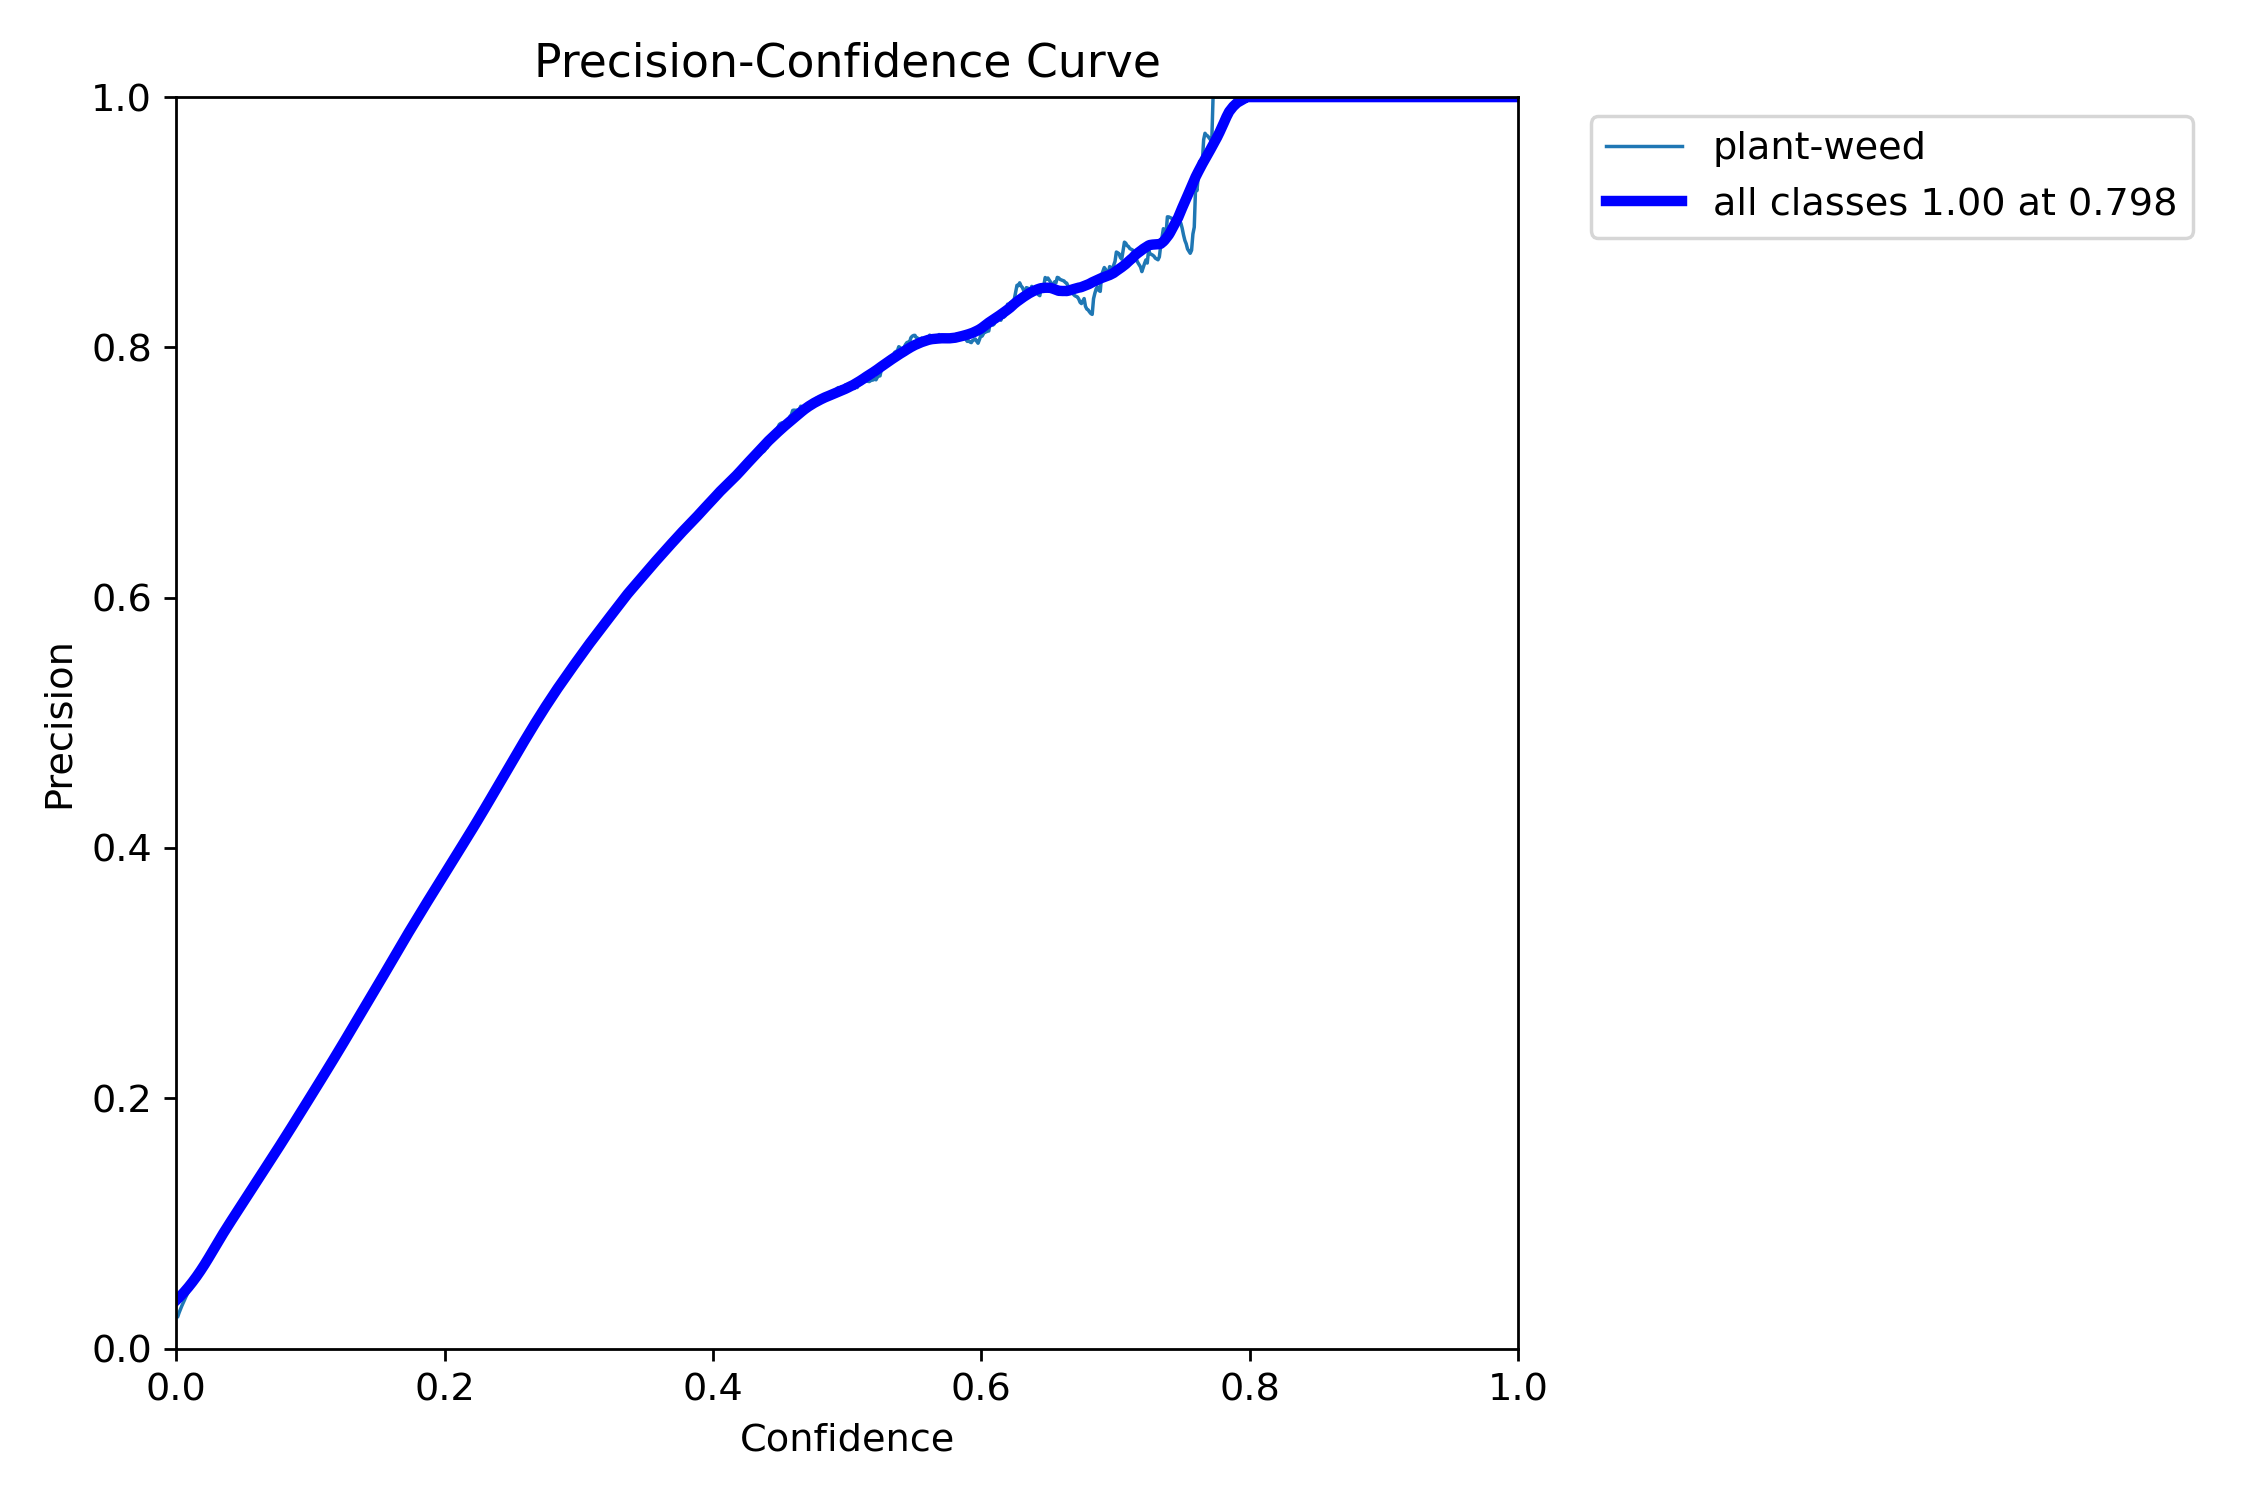

In [16]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

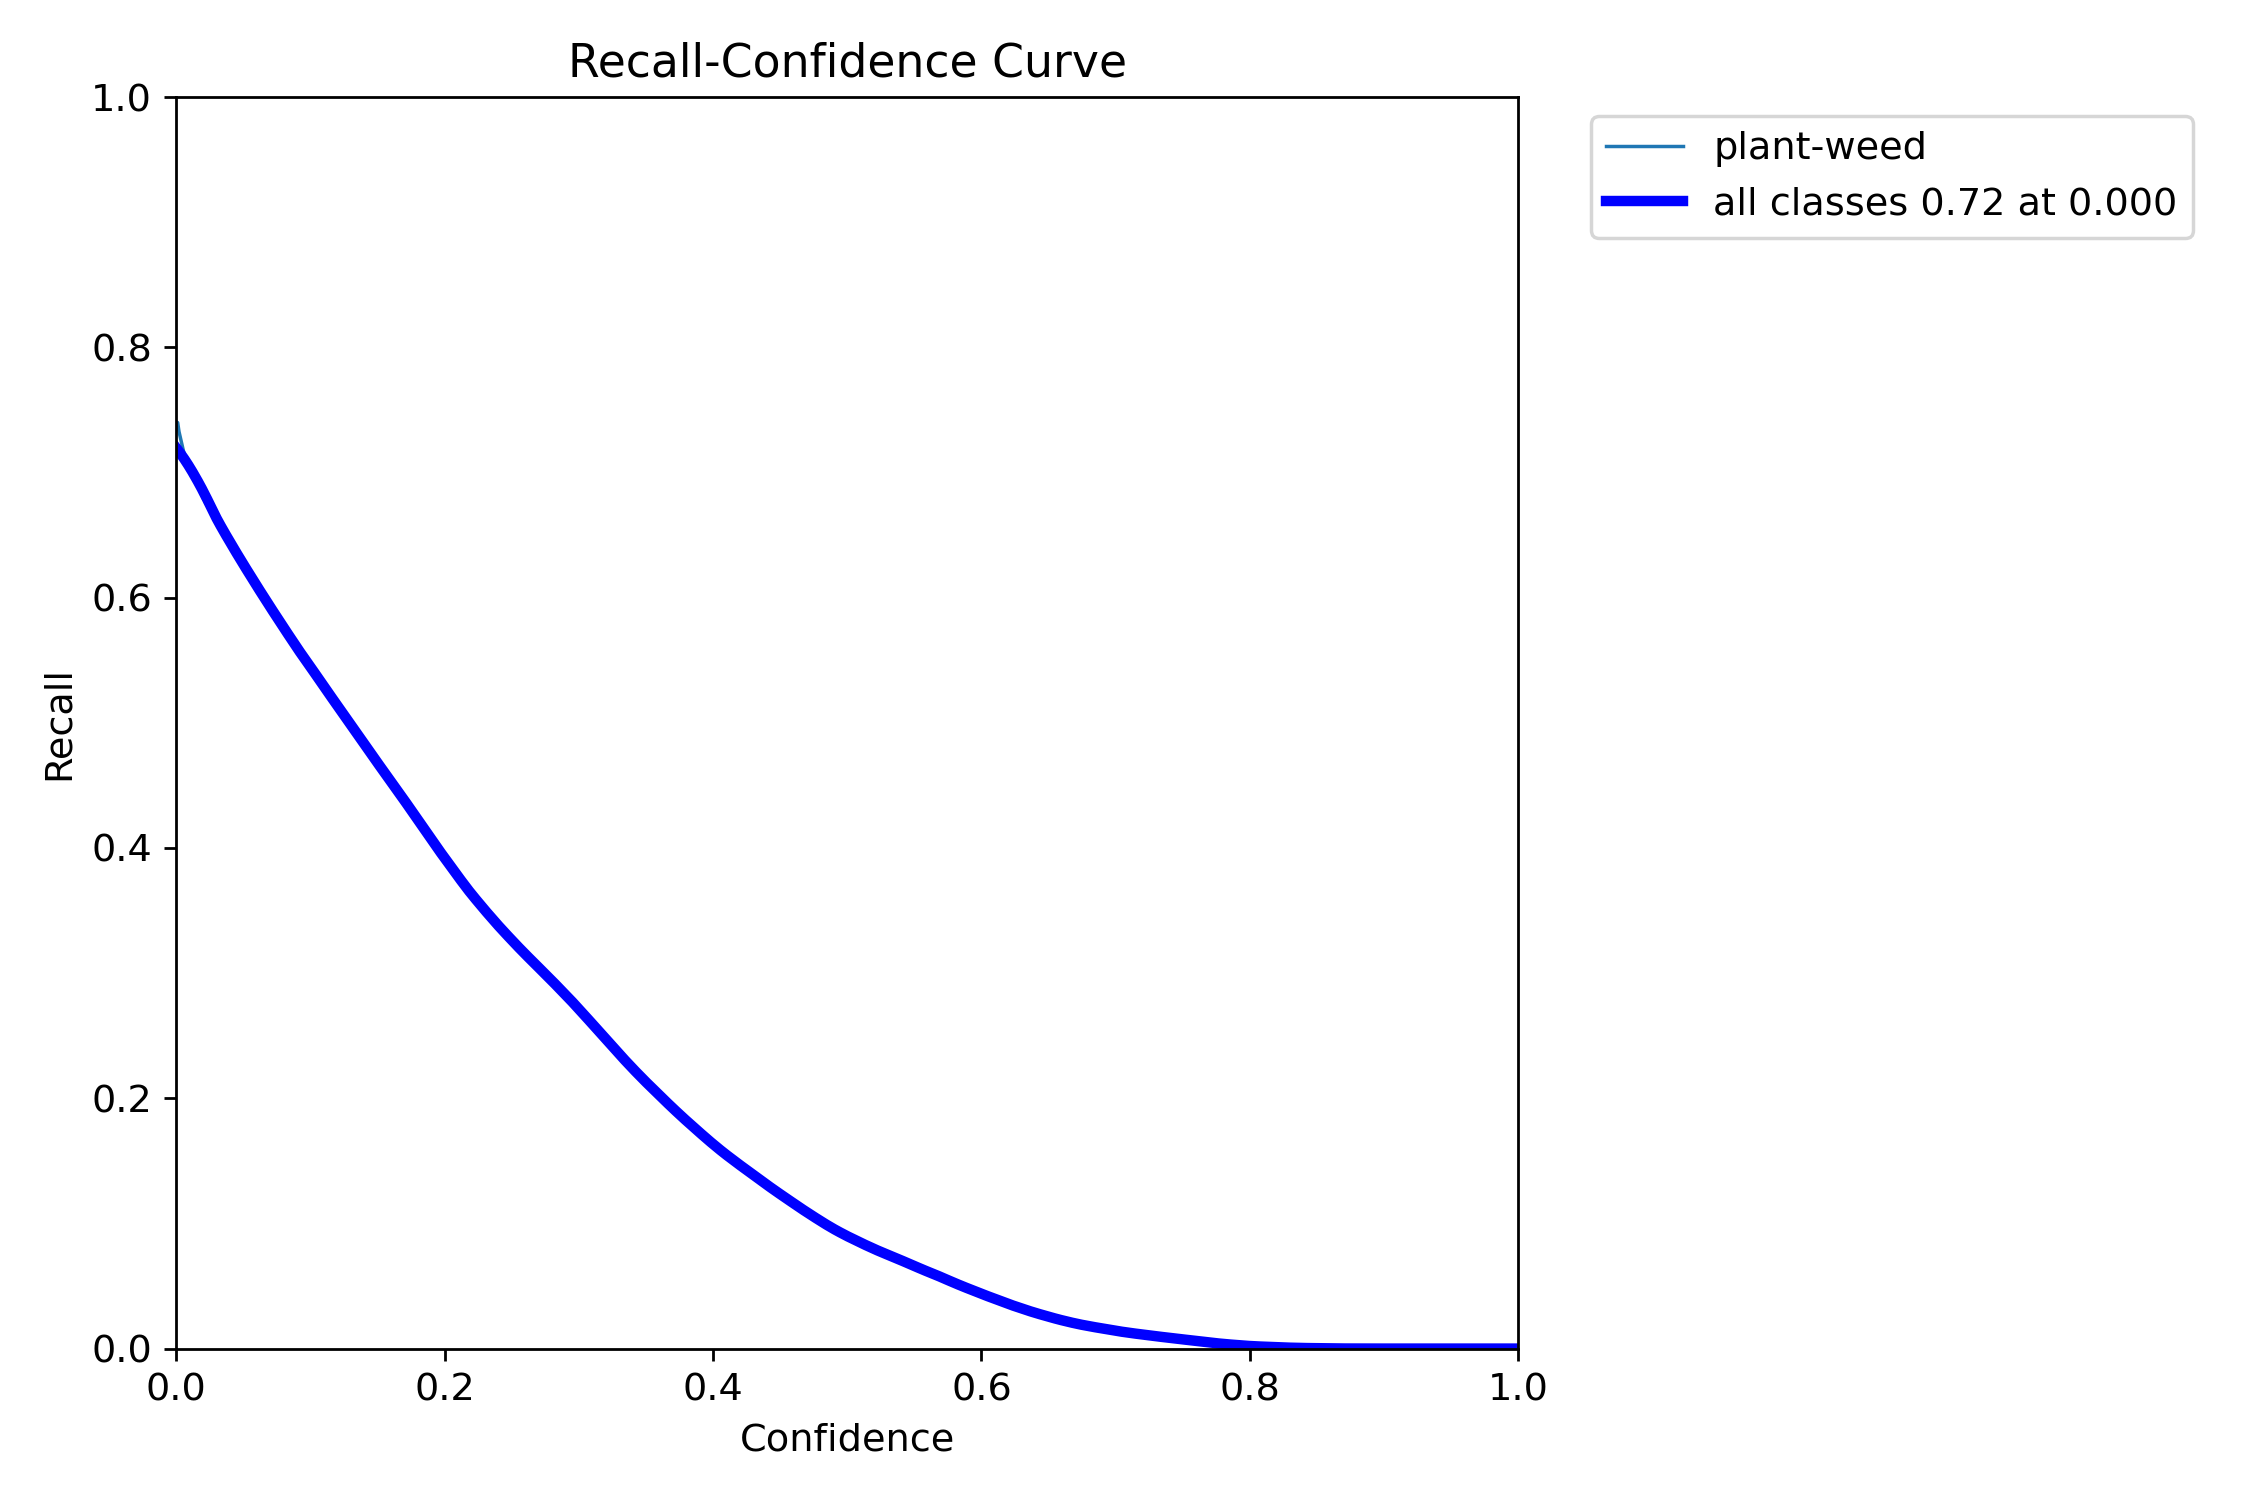

In [17]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

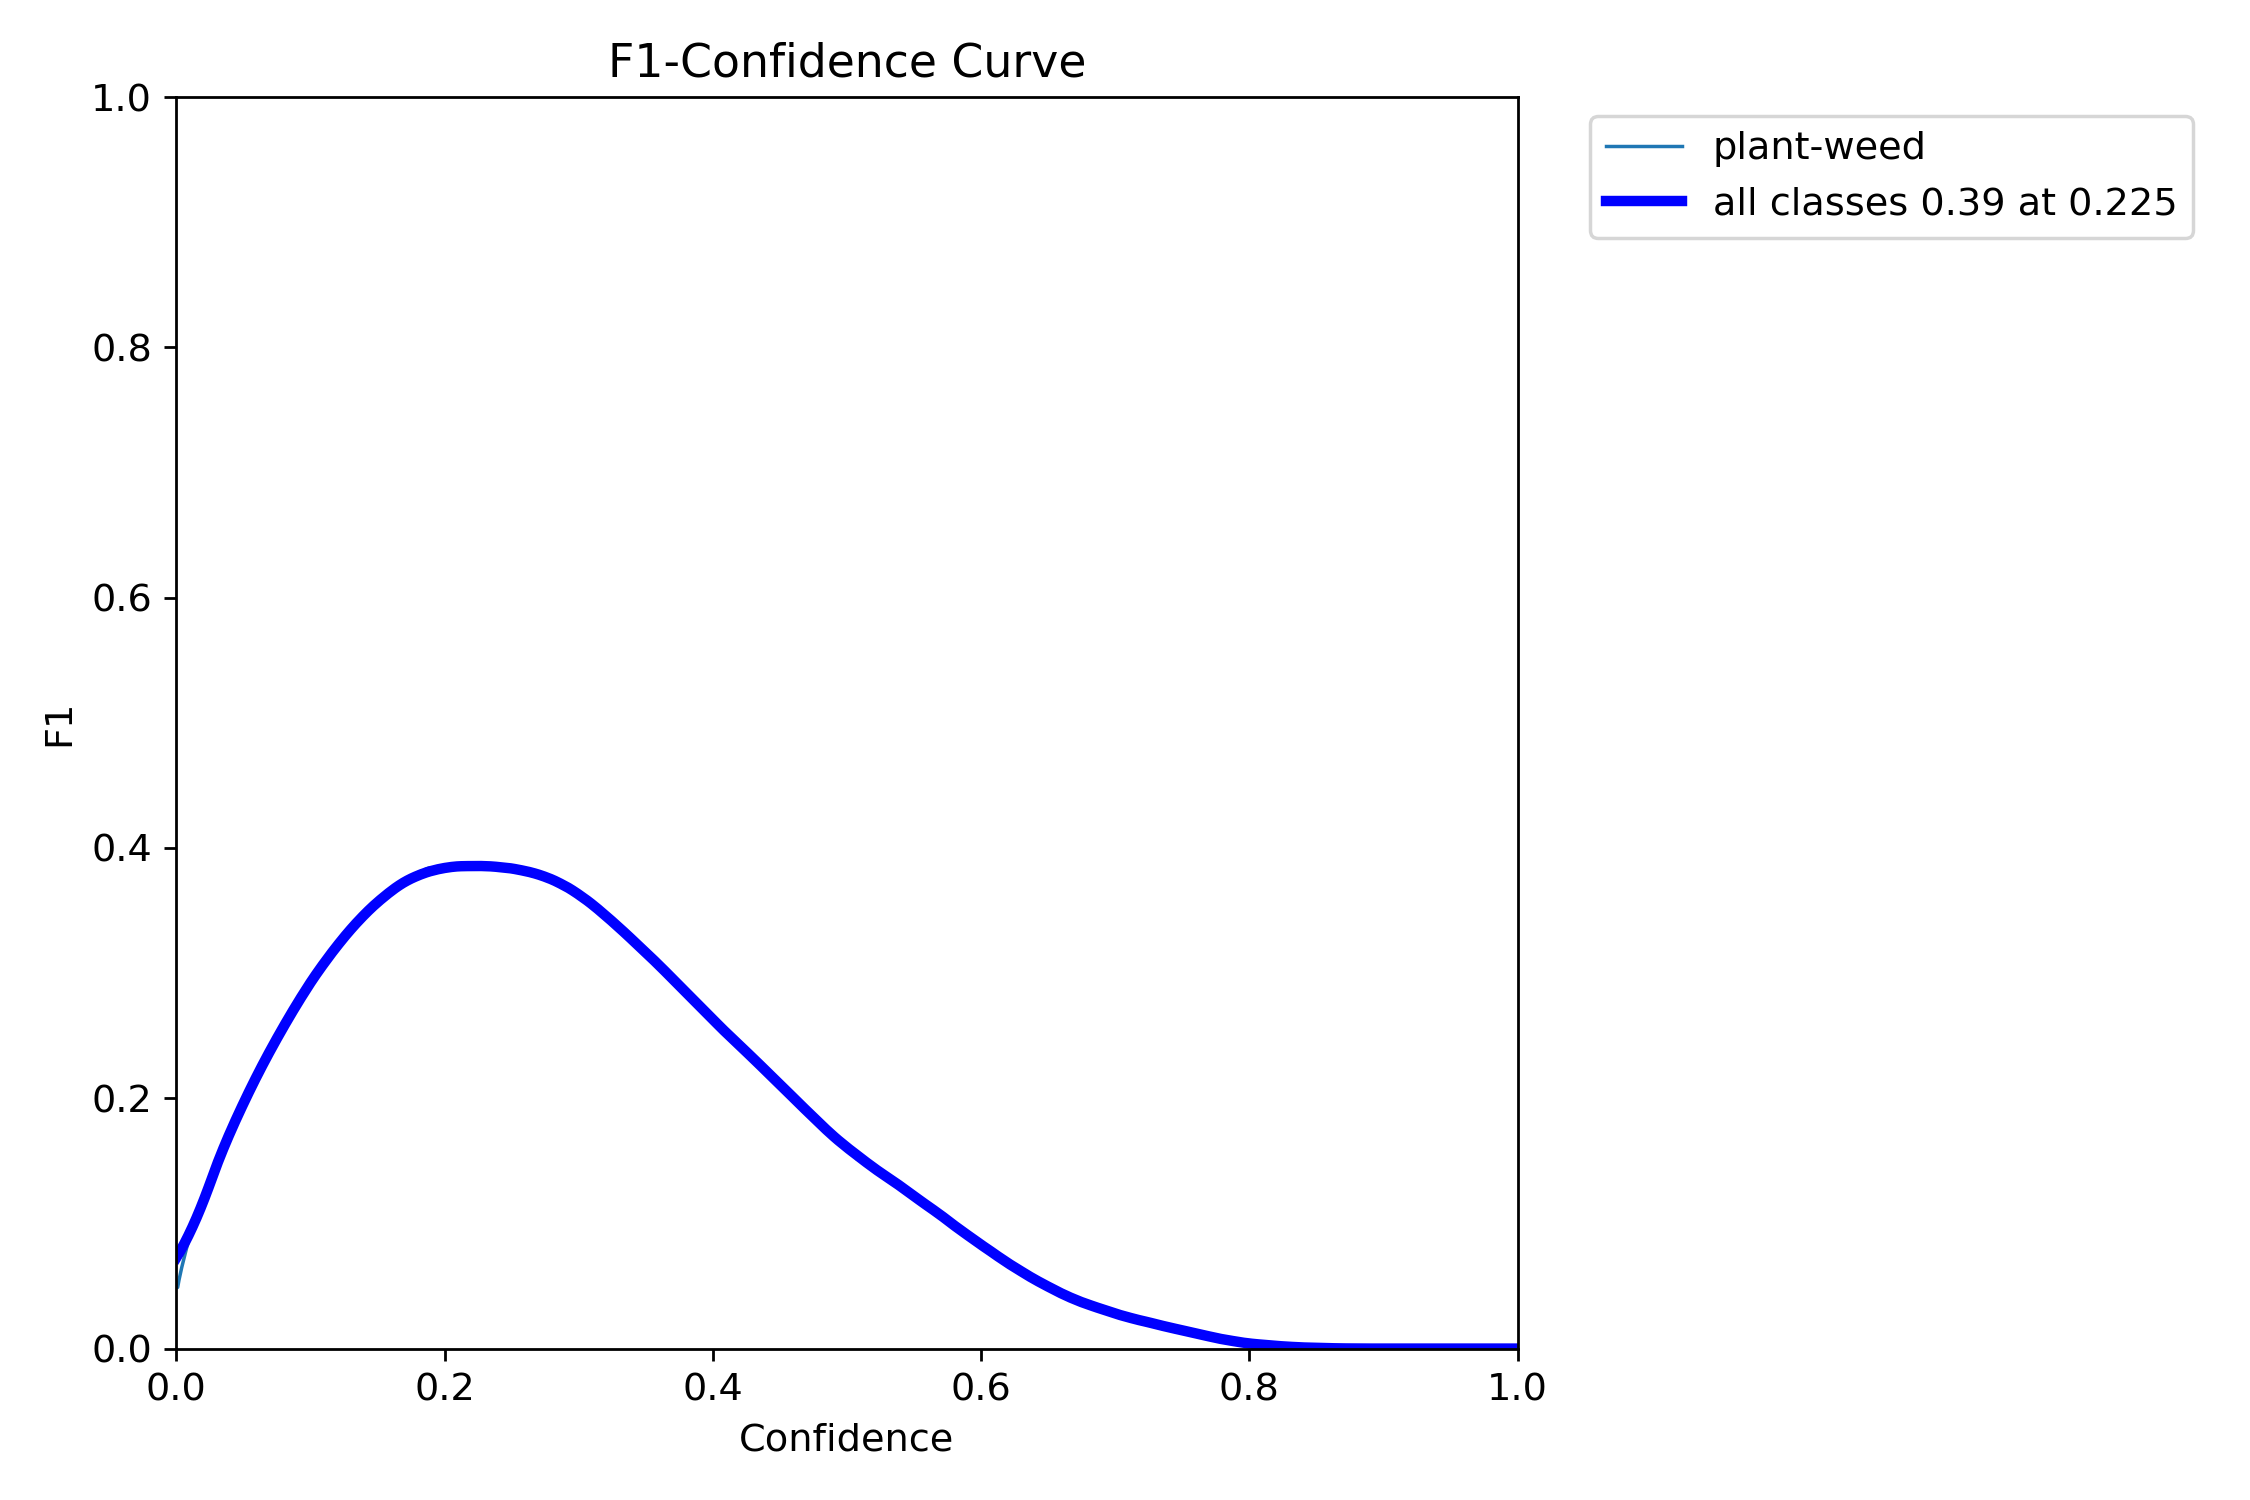

In [18]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

    - Se observa una disminución constante en las pérdidas de entrenamiento, lo que indica que el modelo está aprendiendo a ajustar sus parámetros para minimizar el error en los datos de entrenamiento.
    - Las pérdidas de validación no muestran una mejora significativa después de cierto punto, lo que sugiere que el modelo podría estar sobreajustándose alrededor de la epoch 40. Esto concuerda con la observación anterior de estancamiento y ligero aumento en las pérdidas de validación después de la época 40.

2. **Métricas de validación (Precisión, Recall, mAP)**

    - Precision y Recall muestran cierta mejora en las primeras épocas, pero luego se estabilizan o incluso fluctúan.
    - mAP@50 y mAP@50-95 no muestran mejoras significativas después de cierto punto, lo que refuerza la hipótesis de sobreajuste. Esto se alinea con el valor de mAP@0.5 de 0.319, que indica un rendimiento moderado y dificultades para equilibrar precisión y recall.
    - La matriz de confusión revela un alto número de falsos negativos (47.69%), lo que indica que el modelo tiene dificultades para detectar objetos. La cantidad considerable de falsos positivos (24.87%) también sugiere detecciones erróneas frecuentes.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

    - El lr/pg0 sigue una reducción progresiva, lo que es típico en algunos esquemas de ajuste de tasa de aprendizaje. Esto concuerda con la disminución gradual observada en los valores de lr/pg0, lr/pg1 y lr/pg2 a lo largo de las épocas.
    - Puede ser útil ajustar la estrategia de learning rate para evitar que el modelo deje de generalizar demasiado temprano. Se podría experimentar con diferentes programas de aprendizaje para mejorar la convergencia del modelo.

#### Observaciones
- El modelo muestra signos de sobreajuste, especialmente después de la época 40.
- El rendimiento general del modelo es moderado, con dificultades para detectar objetos y un equilibrio deficiente entre precisión y recall.
- La gran cantidad de falsos negativos es un punto crítico que requiere atención.

----

## Experiment 14 *(small weed)*
### *3m | 60º+90º | small*

In [57]:
folder = "train2/"

In [58]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  352.760         1.76656         1.27556         1.33661   
96     97  356.489         1.74257         1.24931         1.31357   
97     98  360.345         1.78616         1.25406         1.32971   
98     99  363.538         1.80088         1.26535         1.32537   
99    100  366.704         1.75346         1.23725         1.31018   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.33850            0.30638           0.21604   
96               0.33448            0.29607           0.21000   
97               0.33708            0.30901           0.21508   
98               0.34492            0.31225           0.21911   
99               0.34166            0.30966           0.21831   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.05936       2.78132       2.04146       1.62064  0.000119   
96              0.05658       2.80701       2.04054       1.63403  0.000099   
97              0.05900       2.78923       2.03379       1.61732  0.000079   
98              0.06076       2.77873       2.03002       1.60795  0.000060   
99              0.06050       2.77632       2.03878       1.60498  0.000040   

      lr/pg1    lr/pg2  
95  0.000119  0.000119  
96  0.000099  0.000099  
97  0.000079  0.000079  
98  0.000060  0.000060  
99  0.000040  0.000040

In [59]:
last_row = df2.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 6.112 min


In [69]:
TP = 503
FP = 561
FN = 1018
base = TP+FP+FN
base

2082

In [70]:
TP/base, FP/base, FN/base

(0.24159462055715658, 0.26945244956772335, 0.48895292987512007)

### Graphs

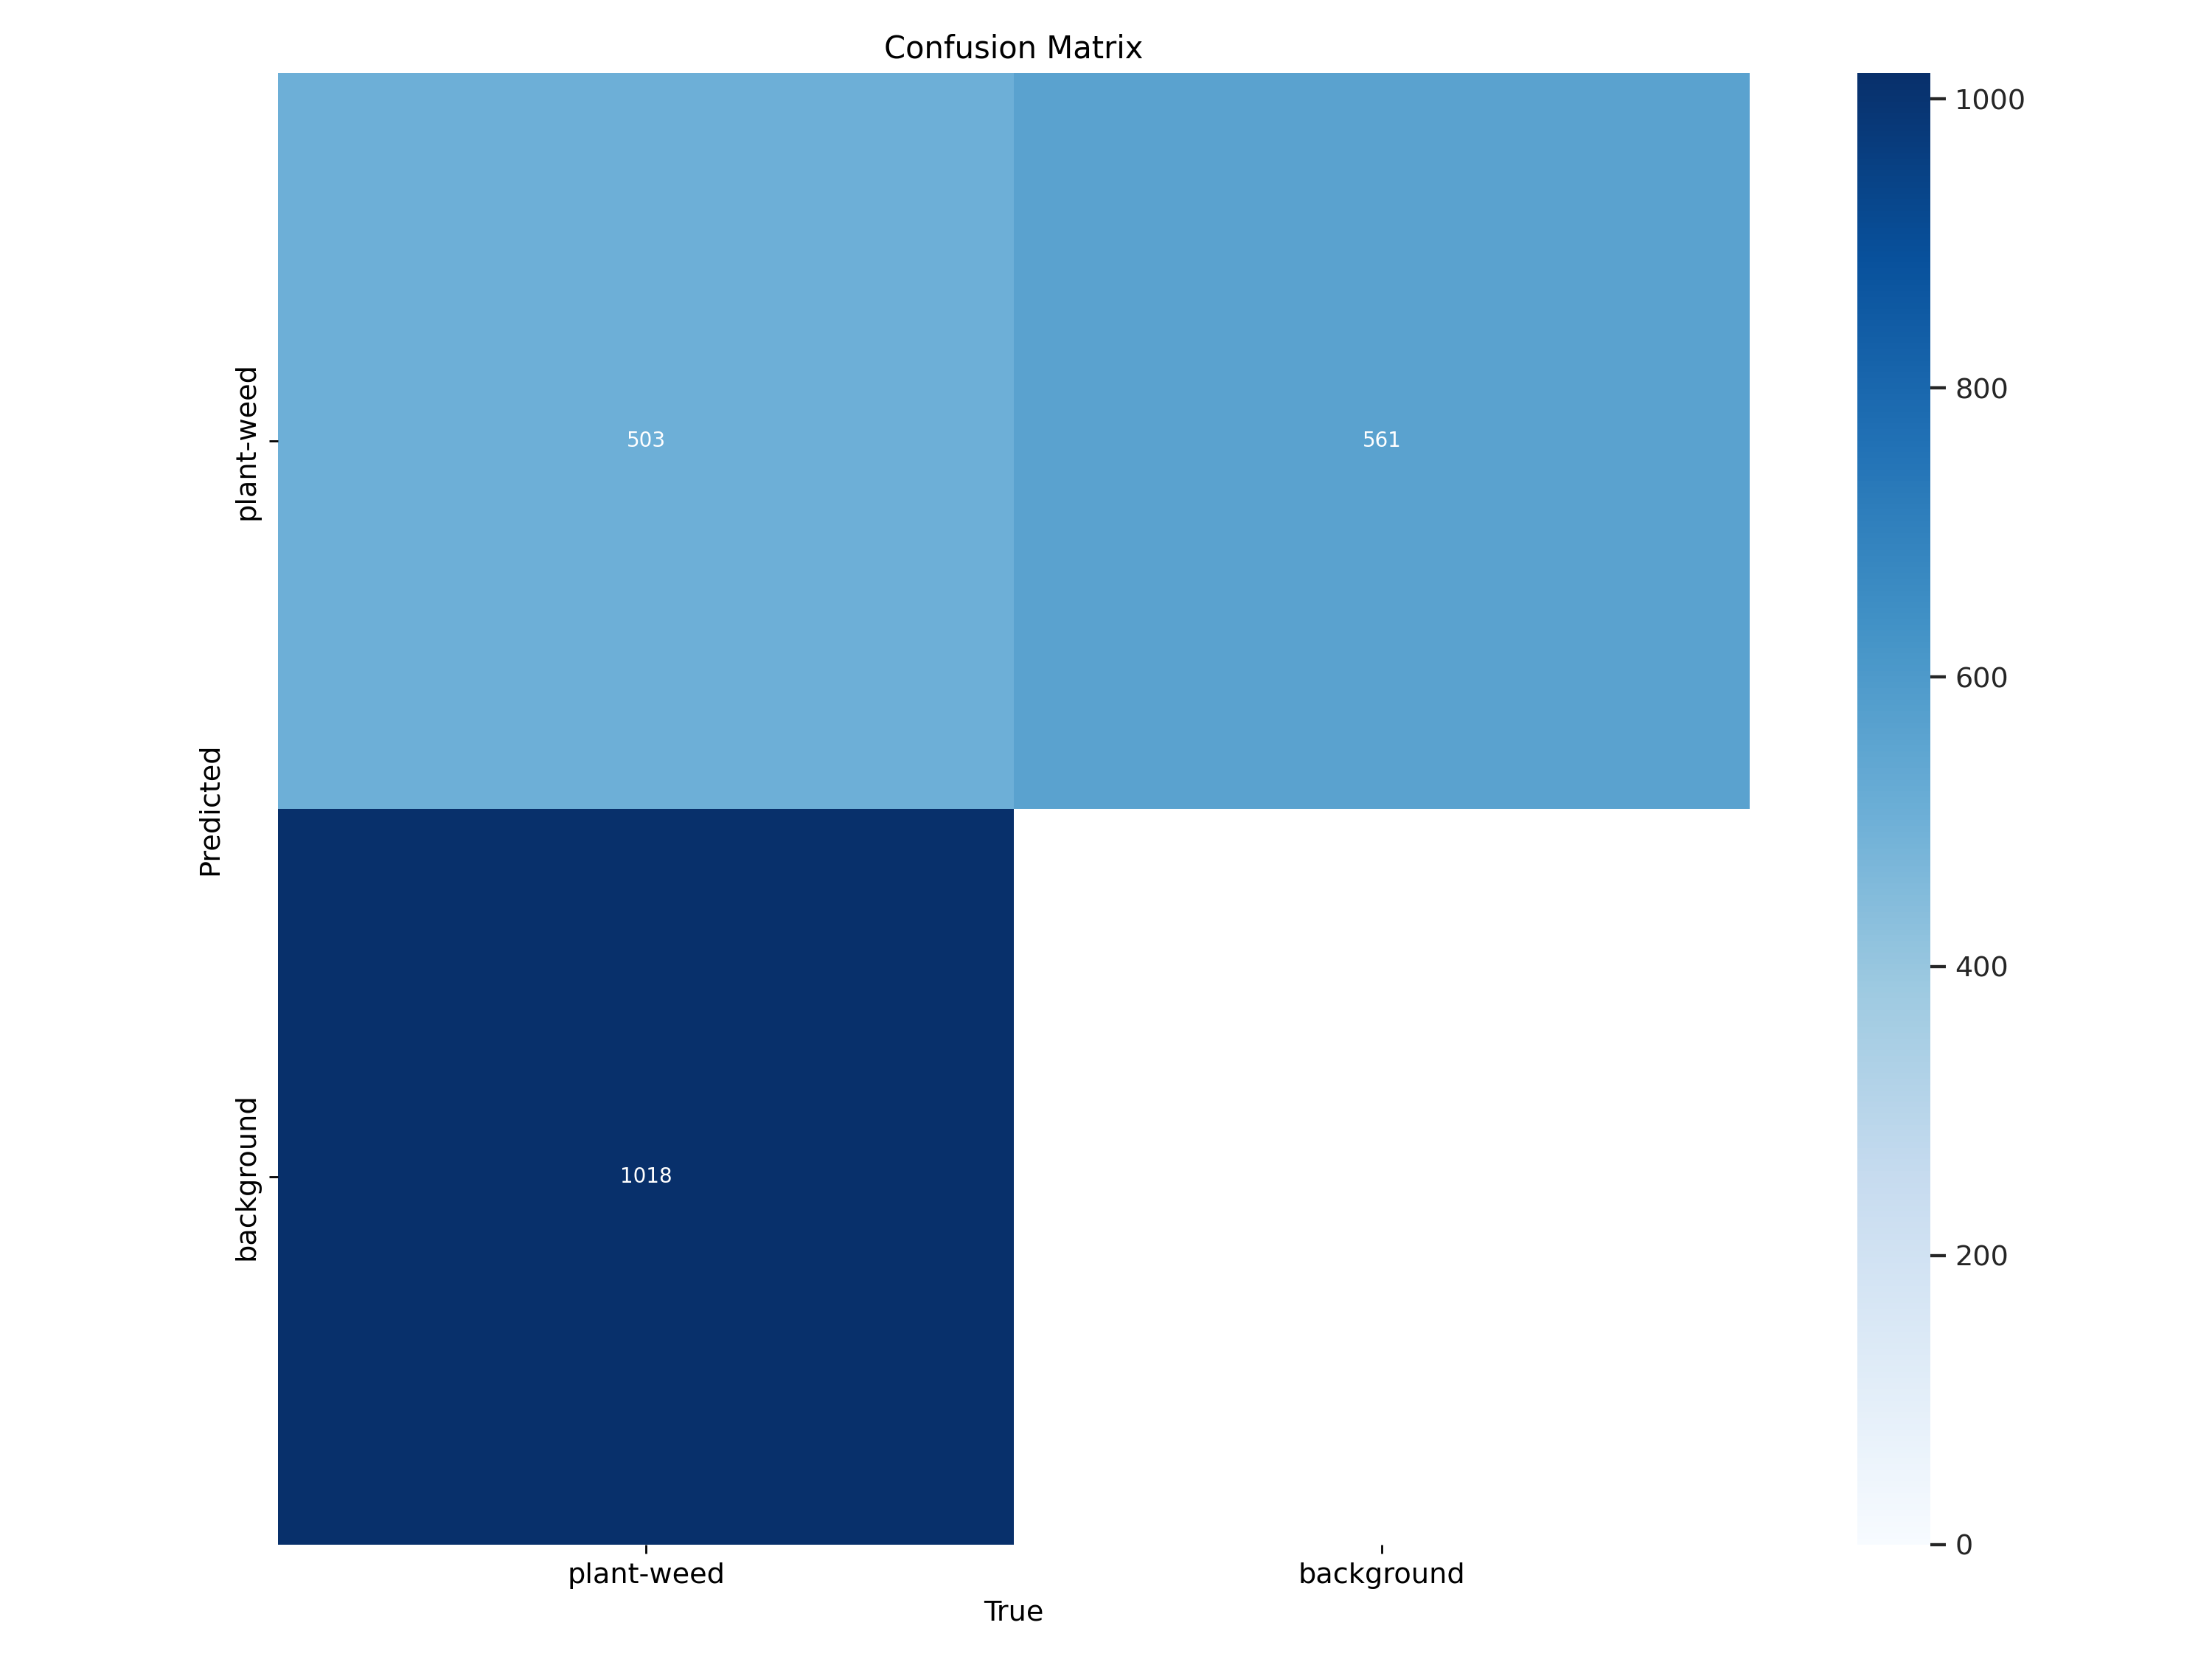

In [62]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

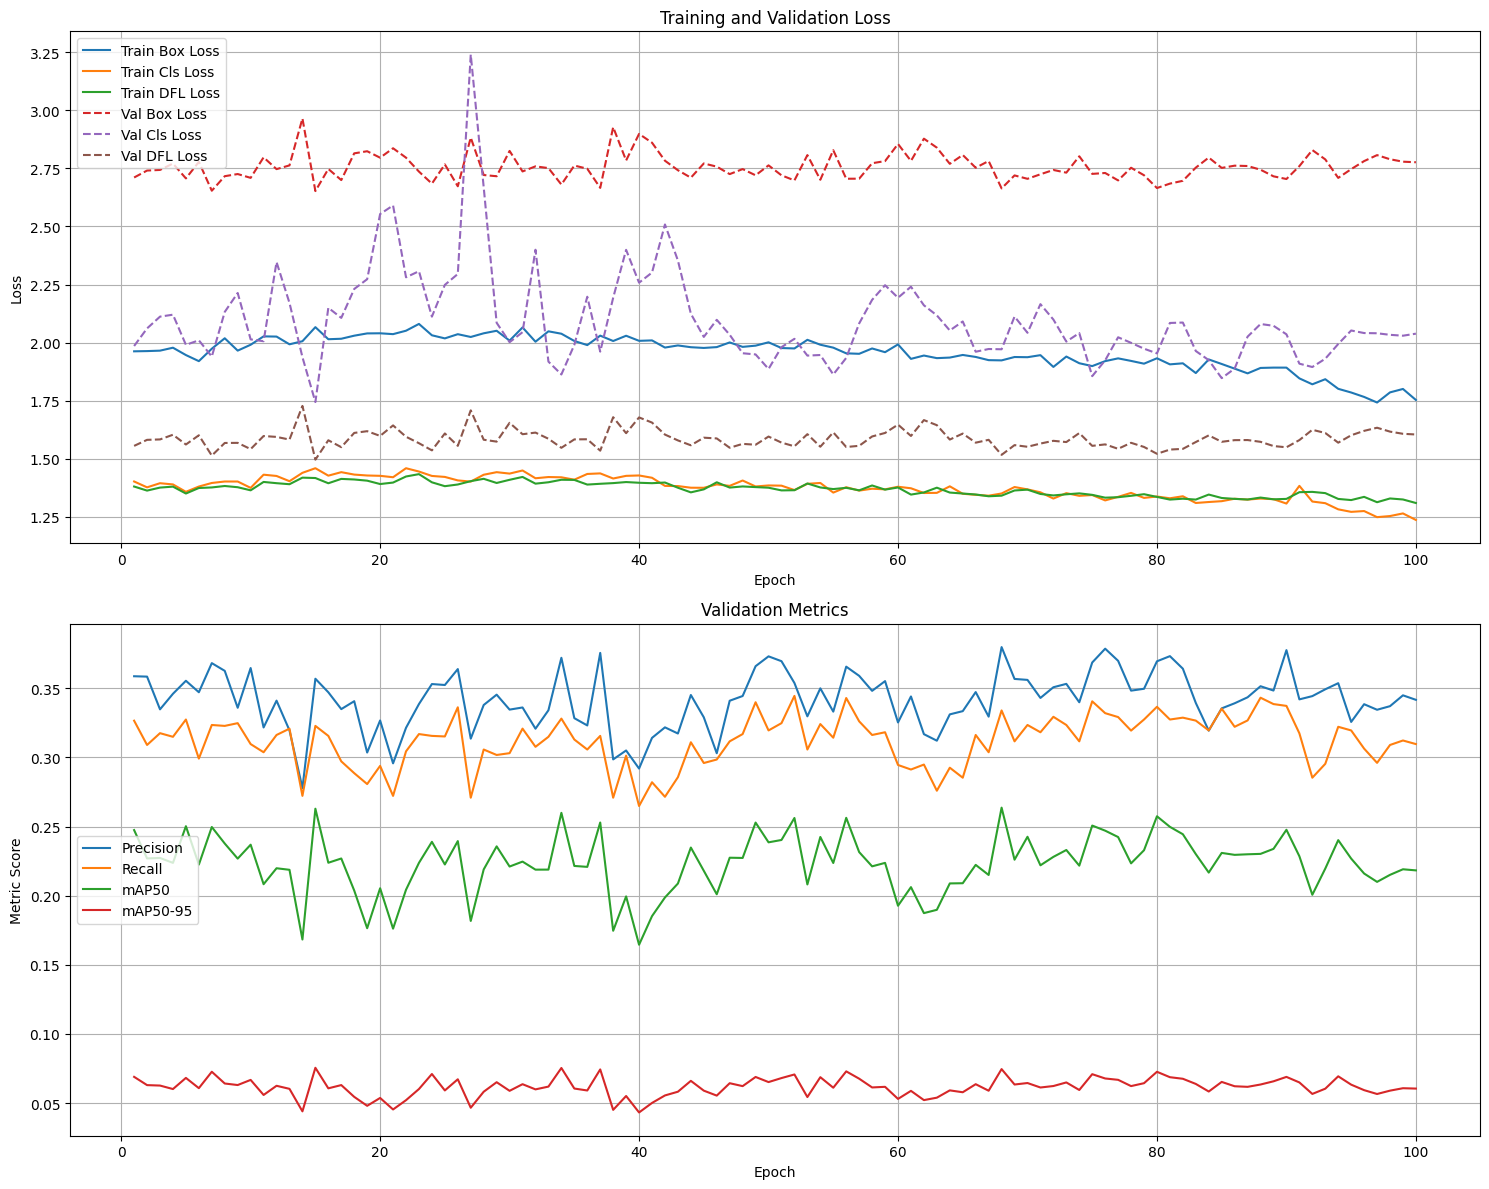

In [63]:
graph_training_metrics(df2, graph="full")

In [64]:
graph_LrLoss_3D(df2)

Validation set


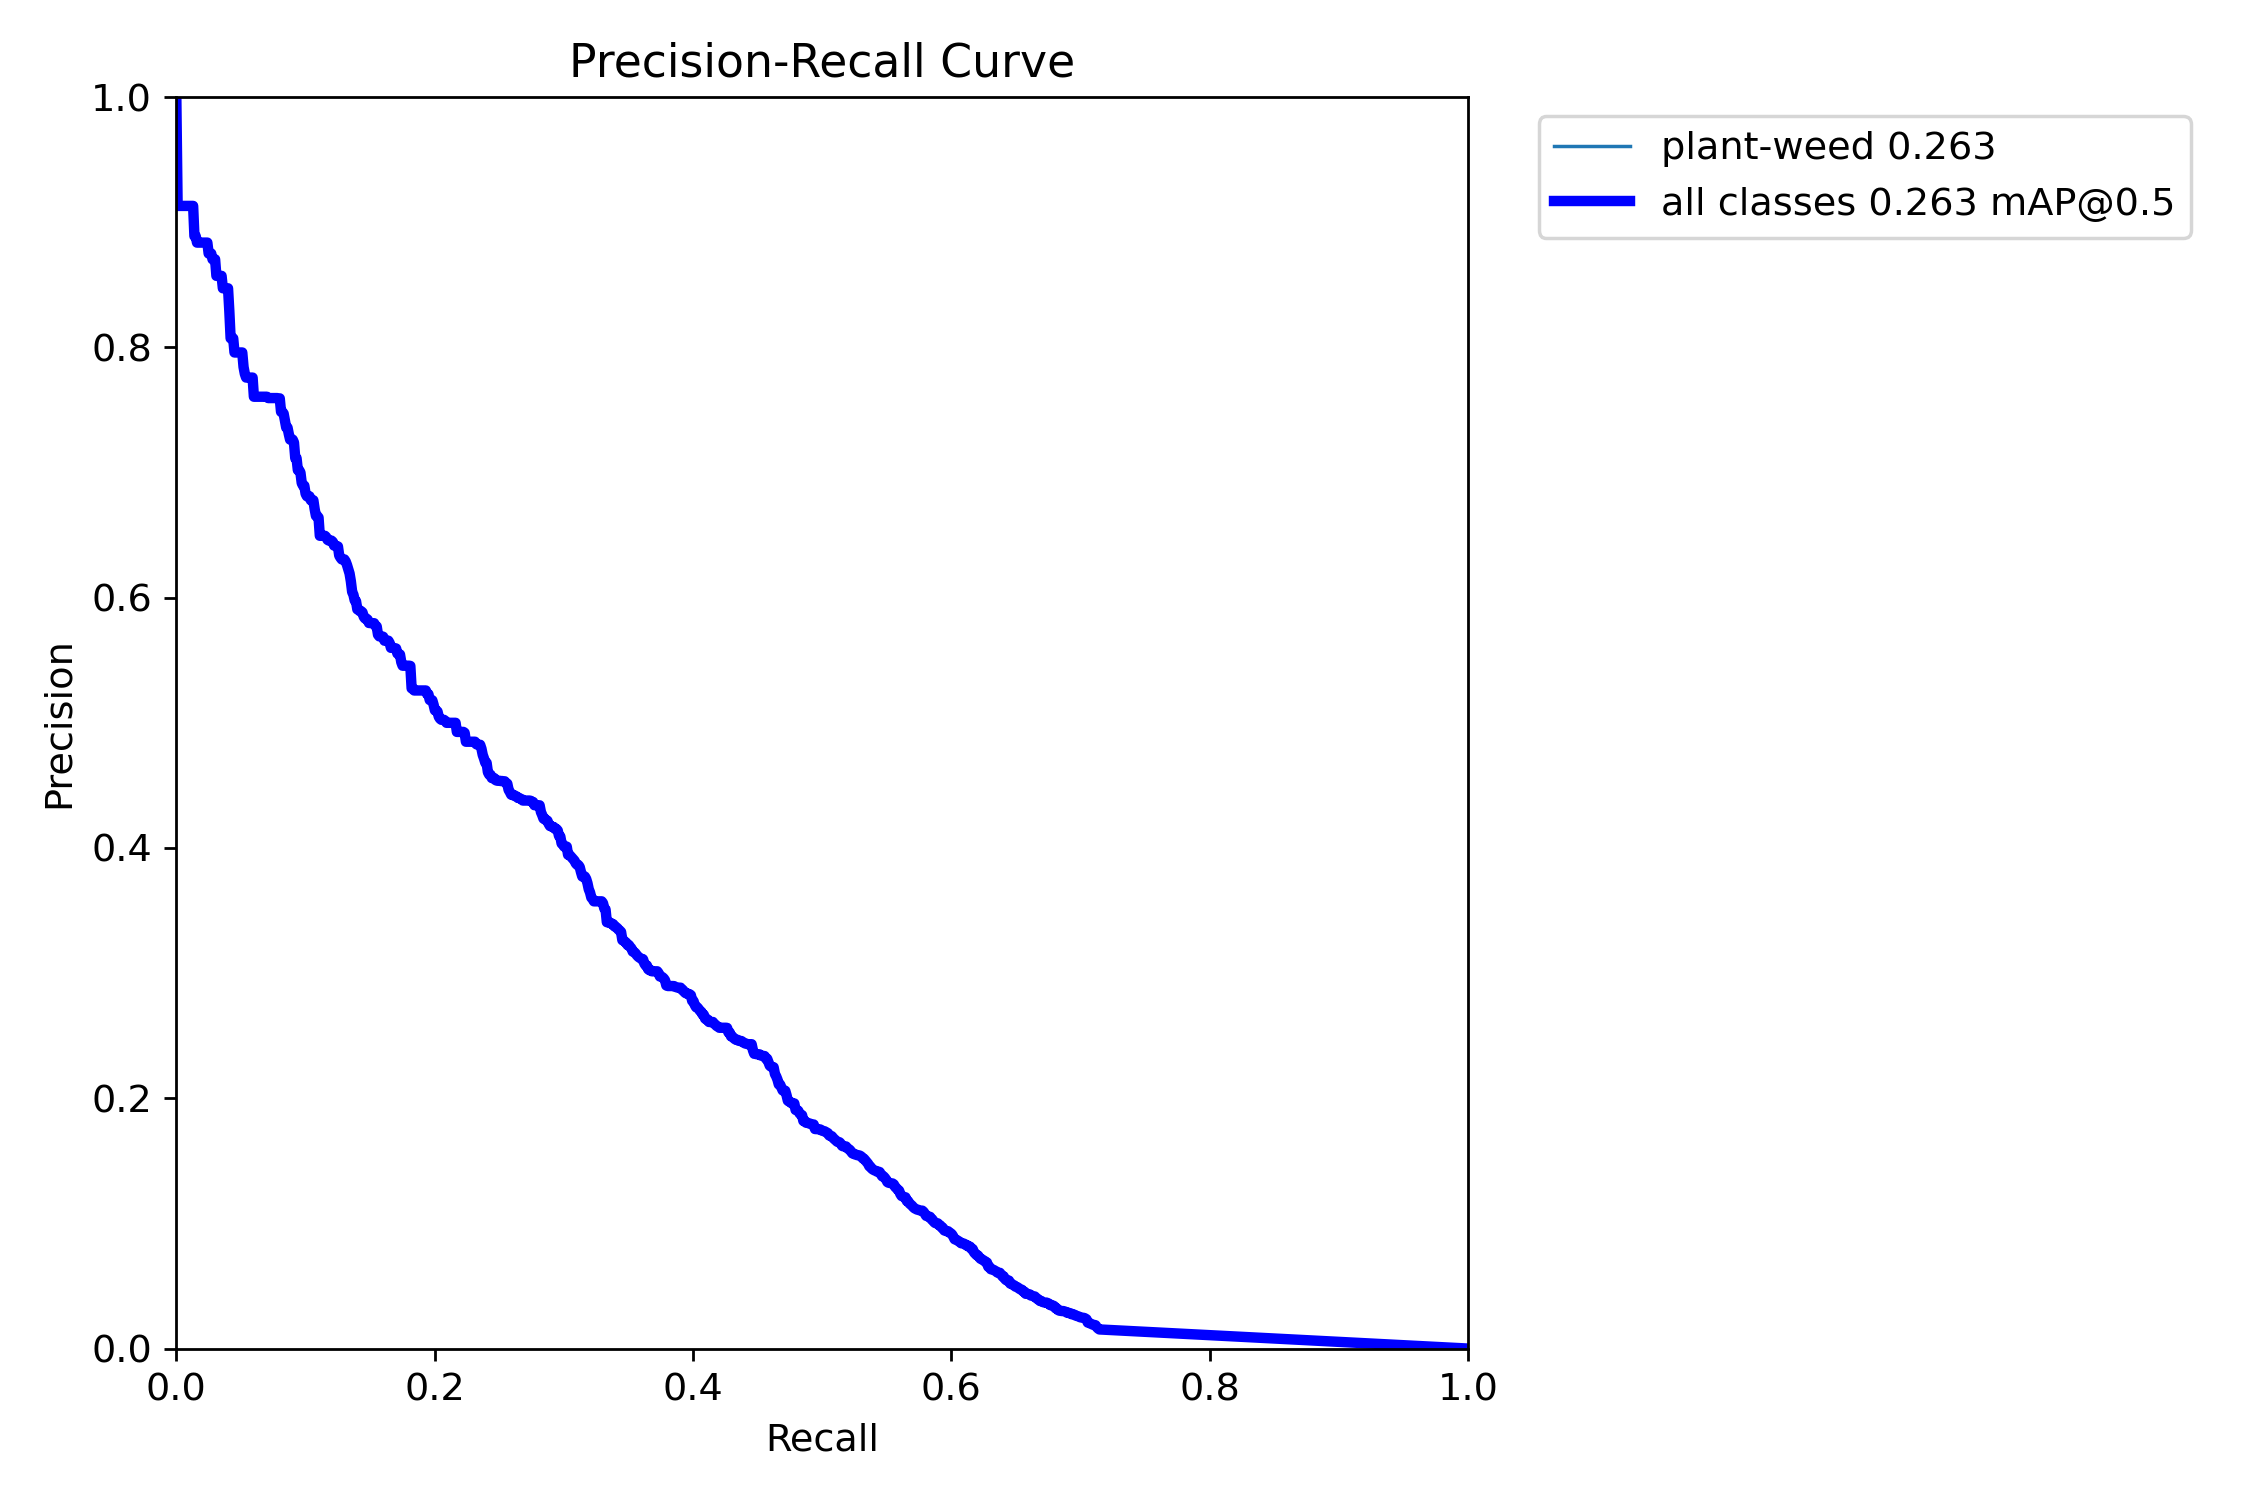

In [65]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

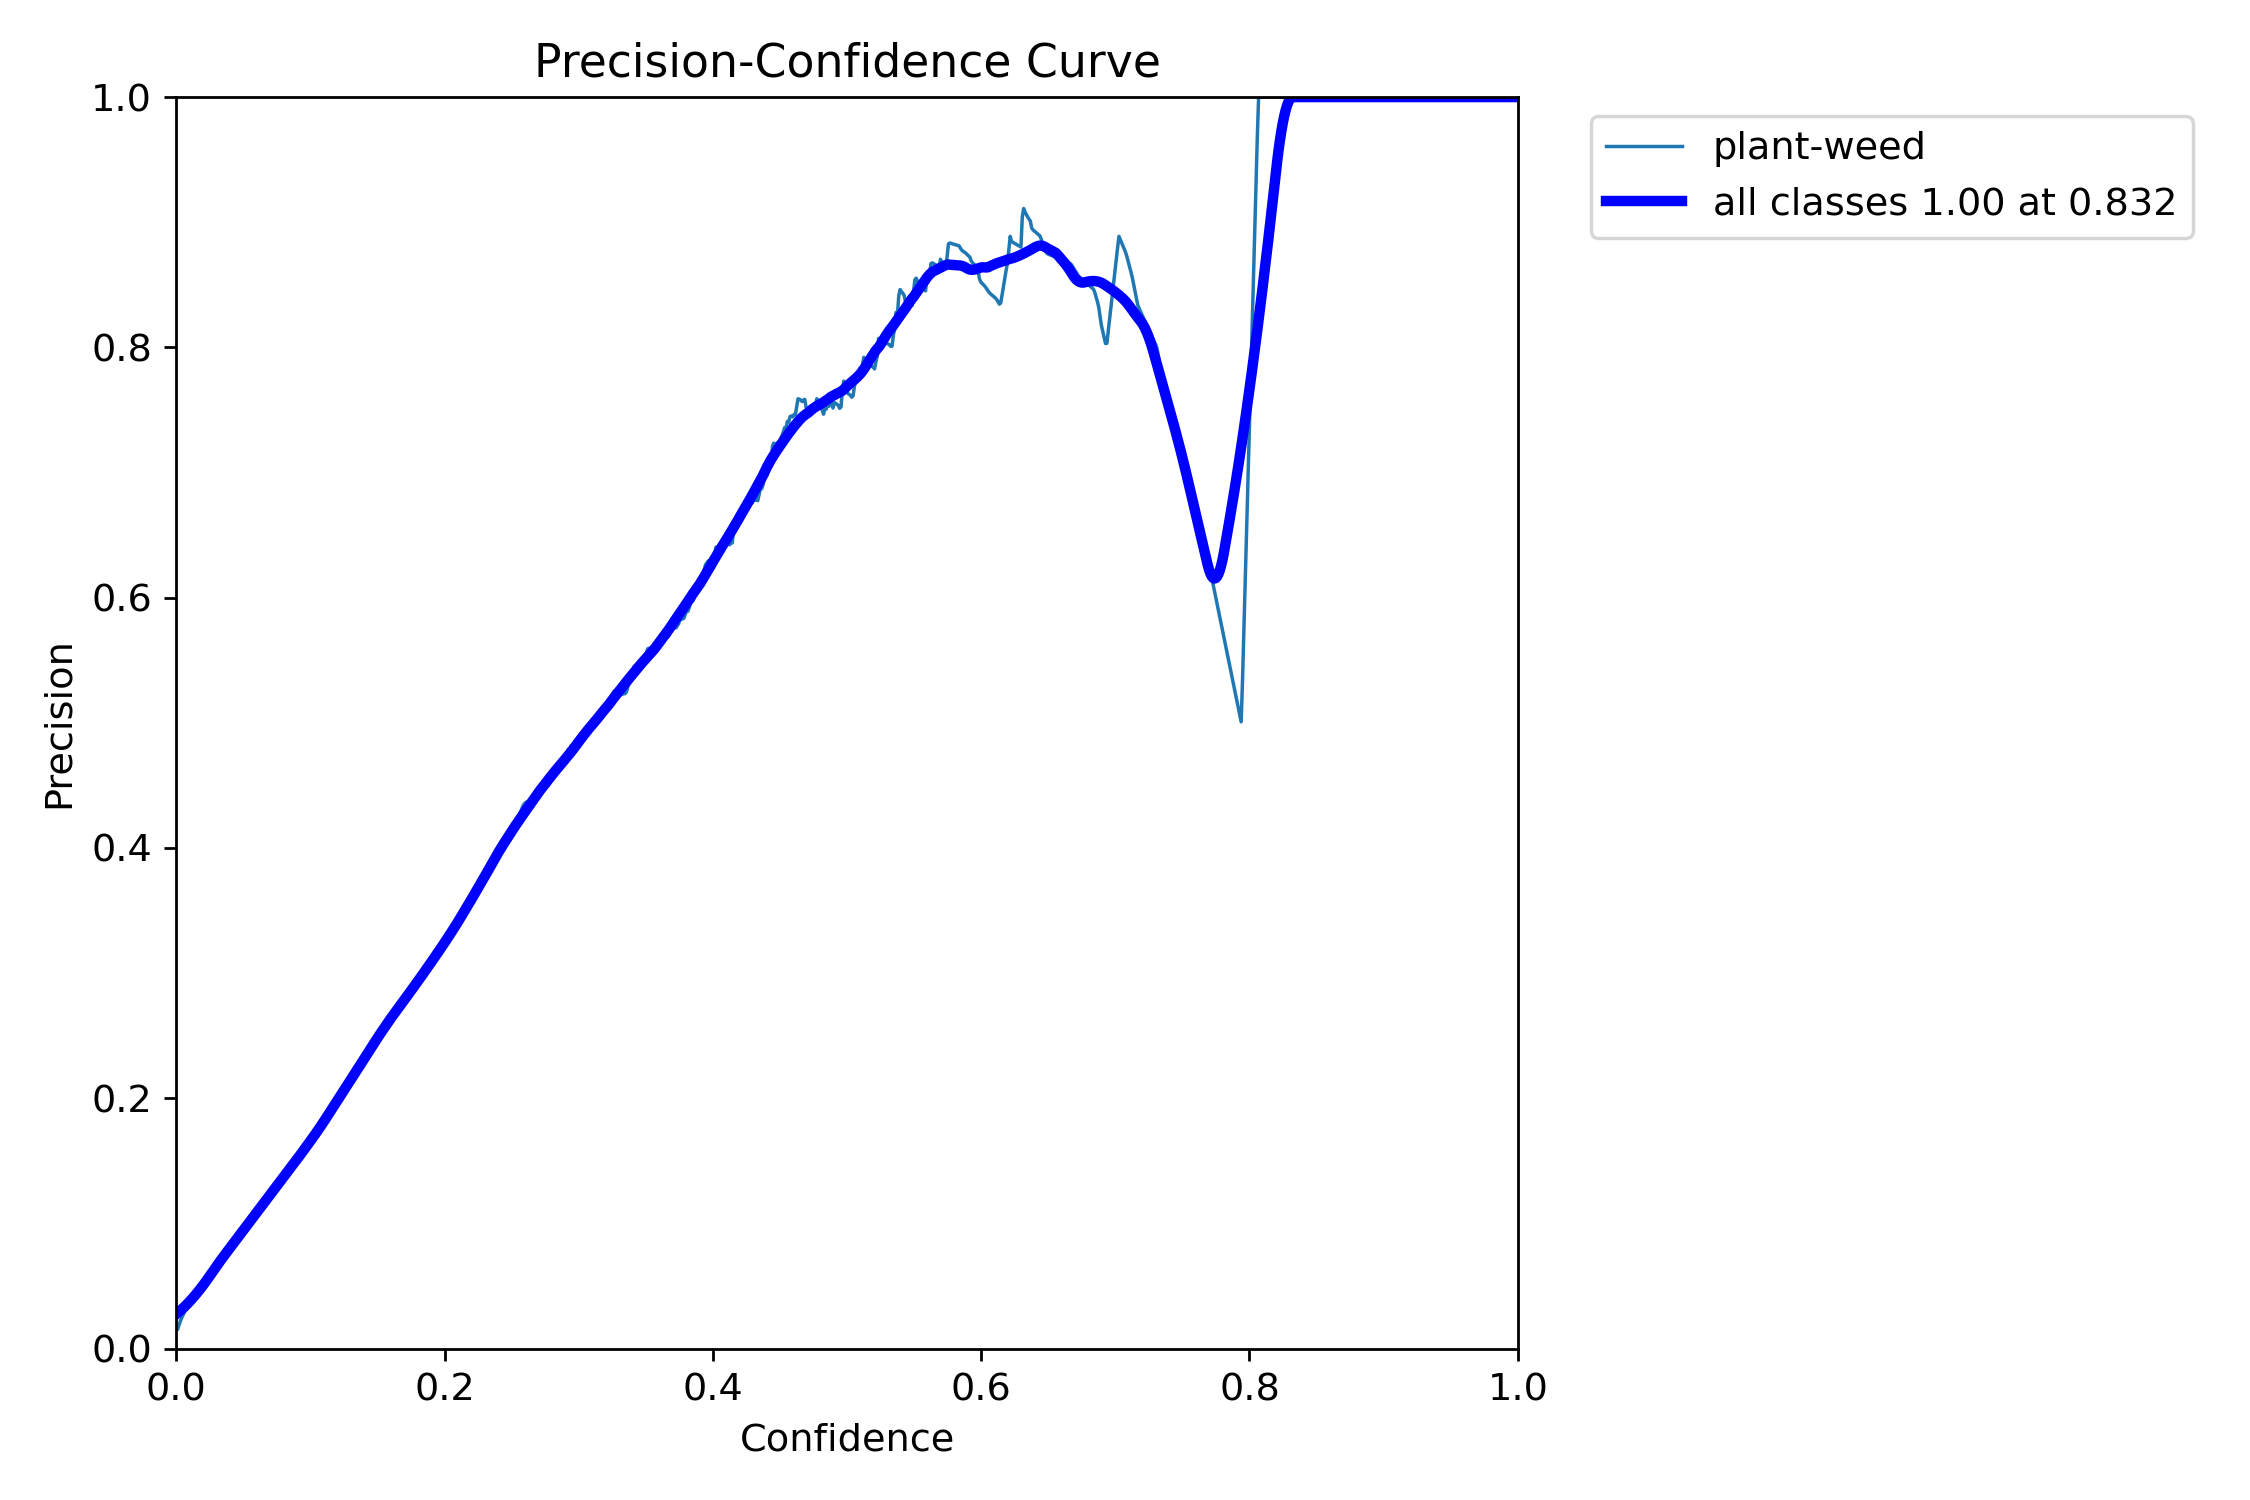

In [66]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

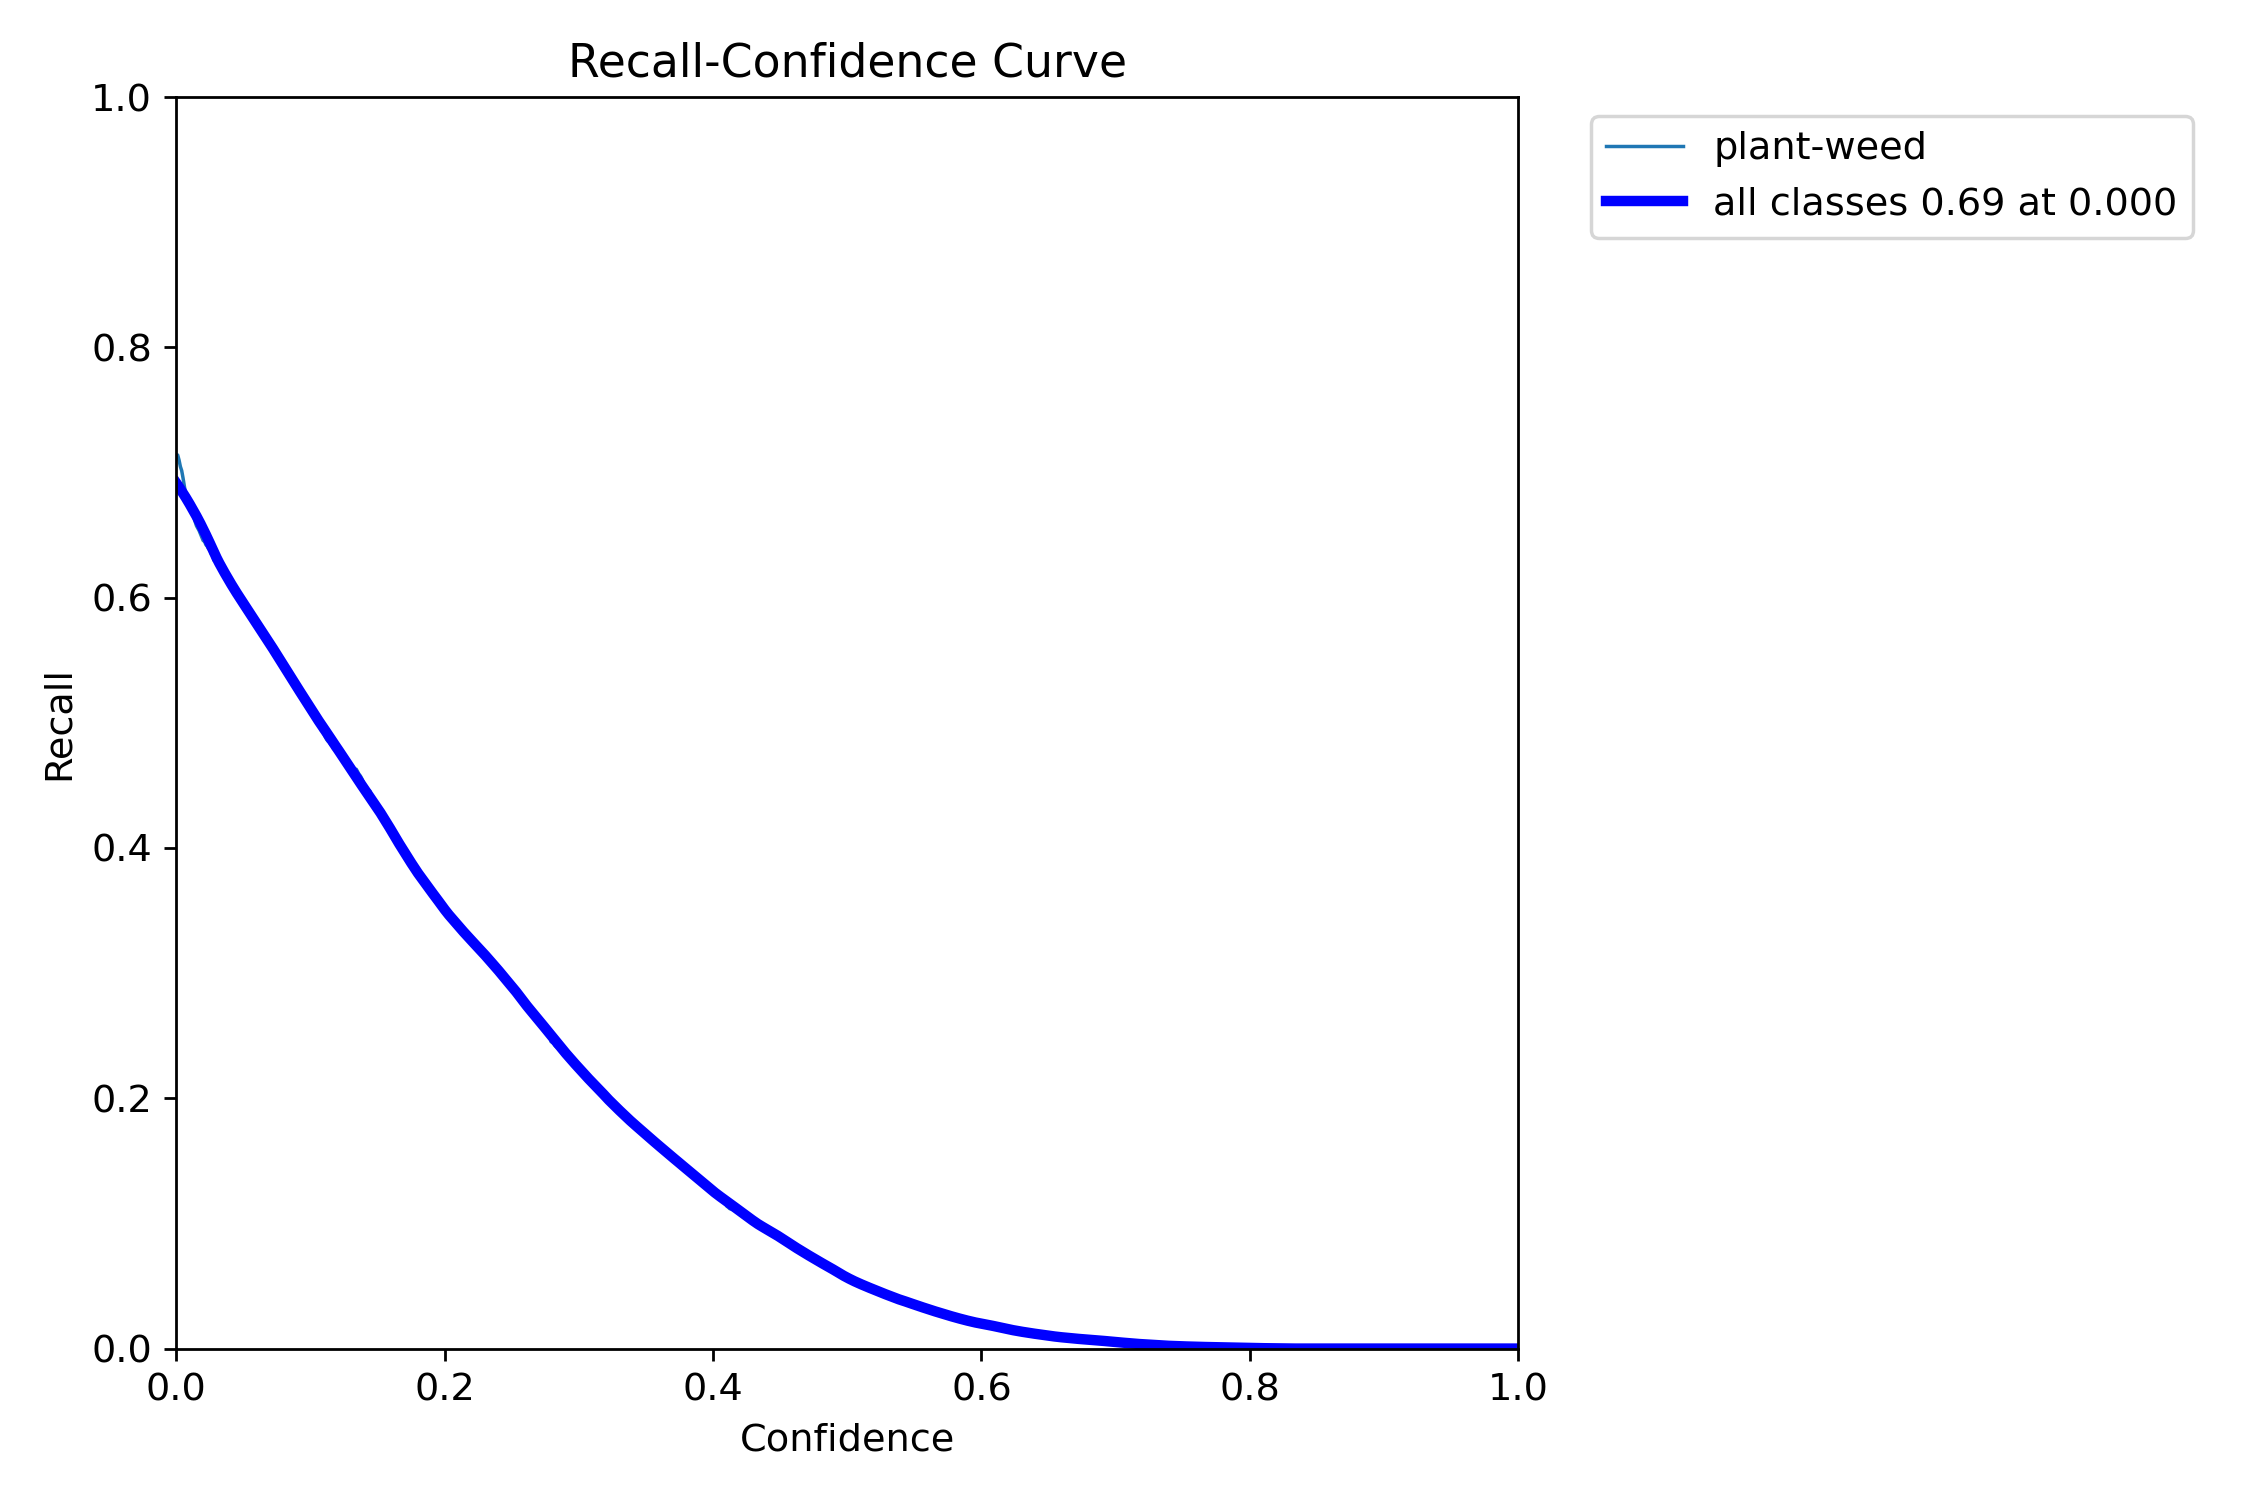

In [67]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

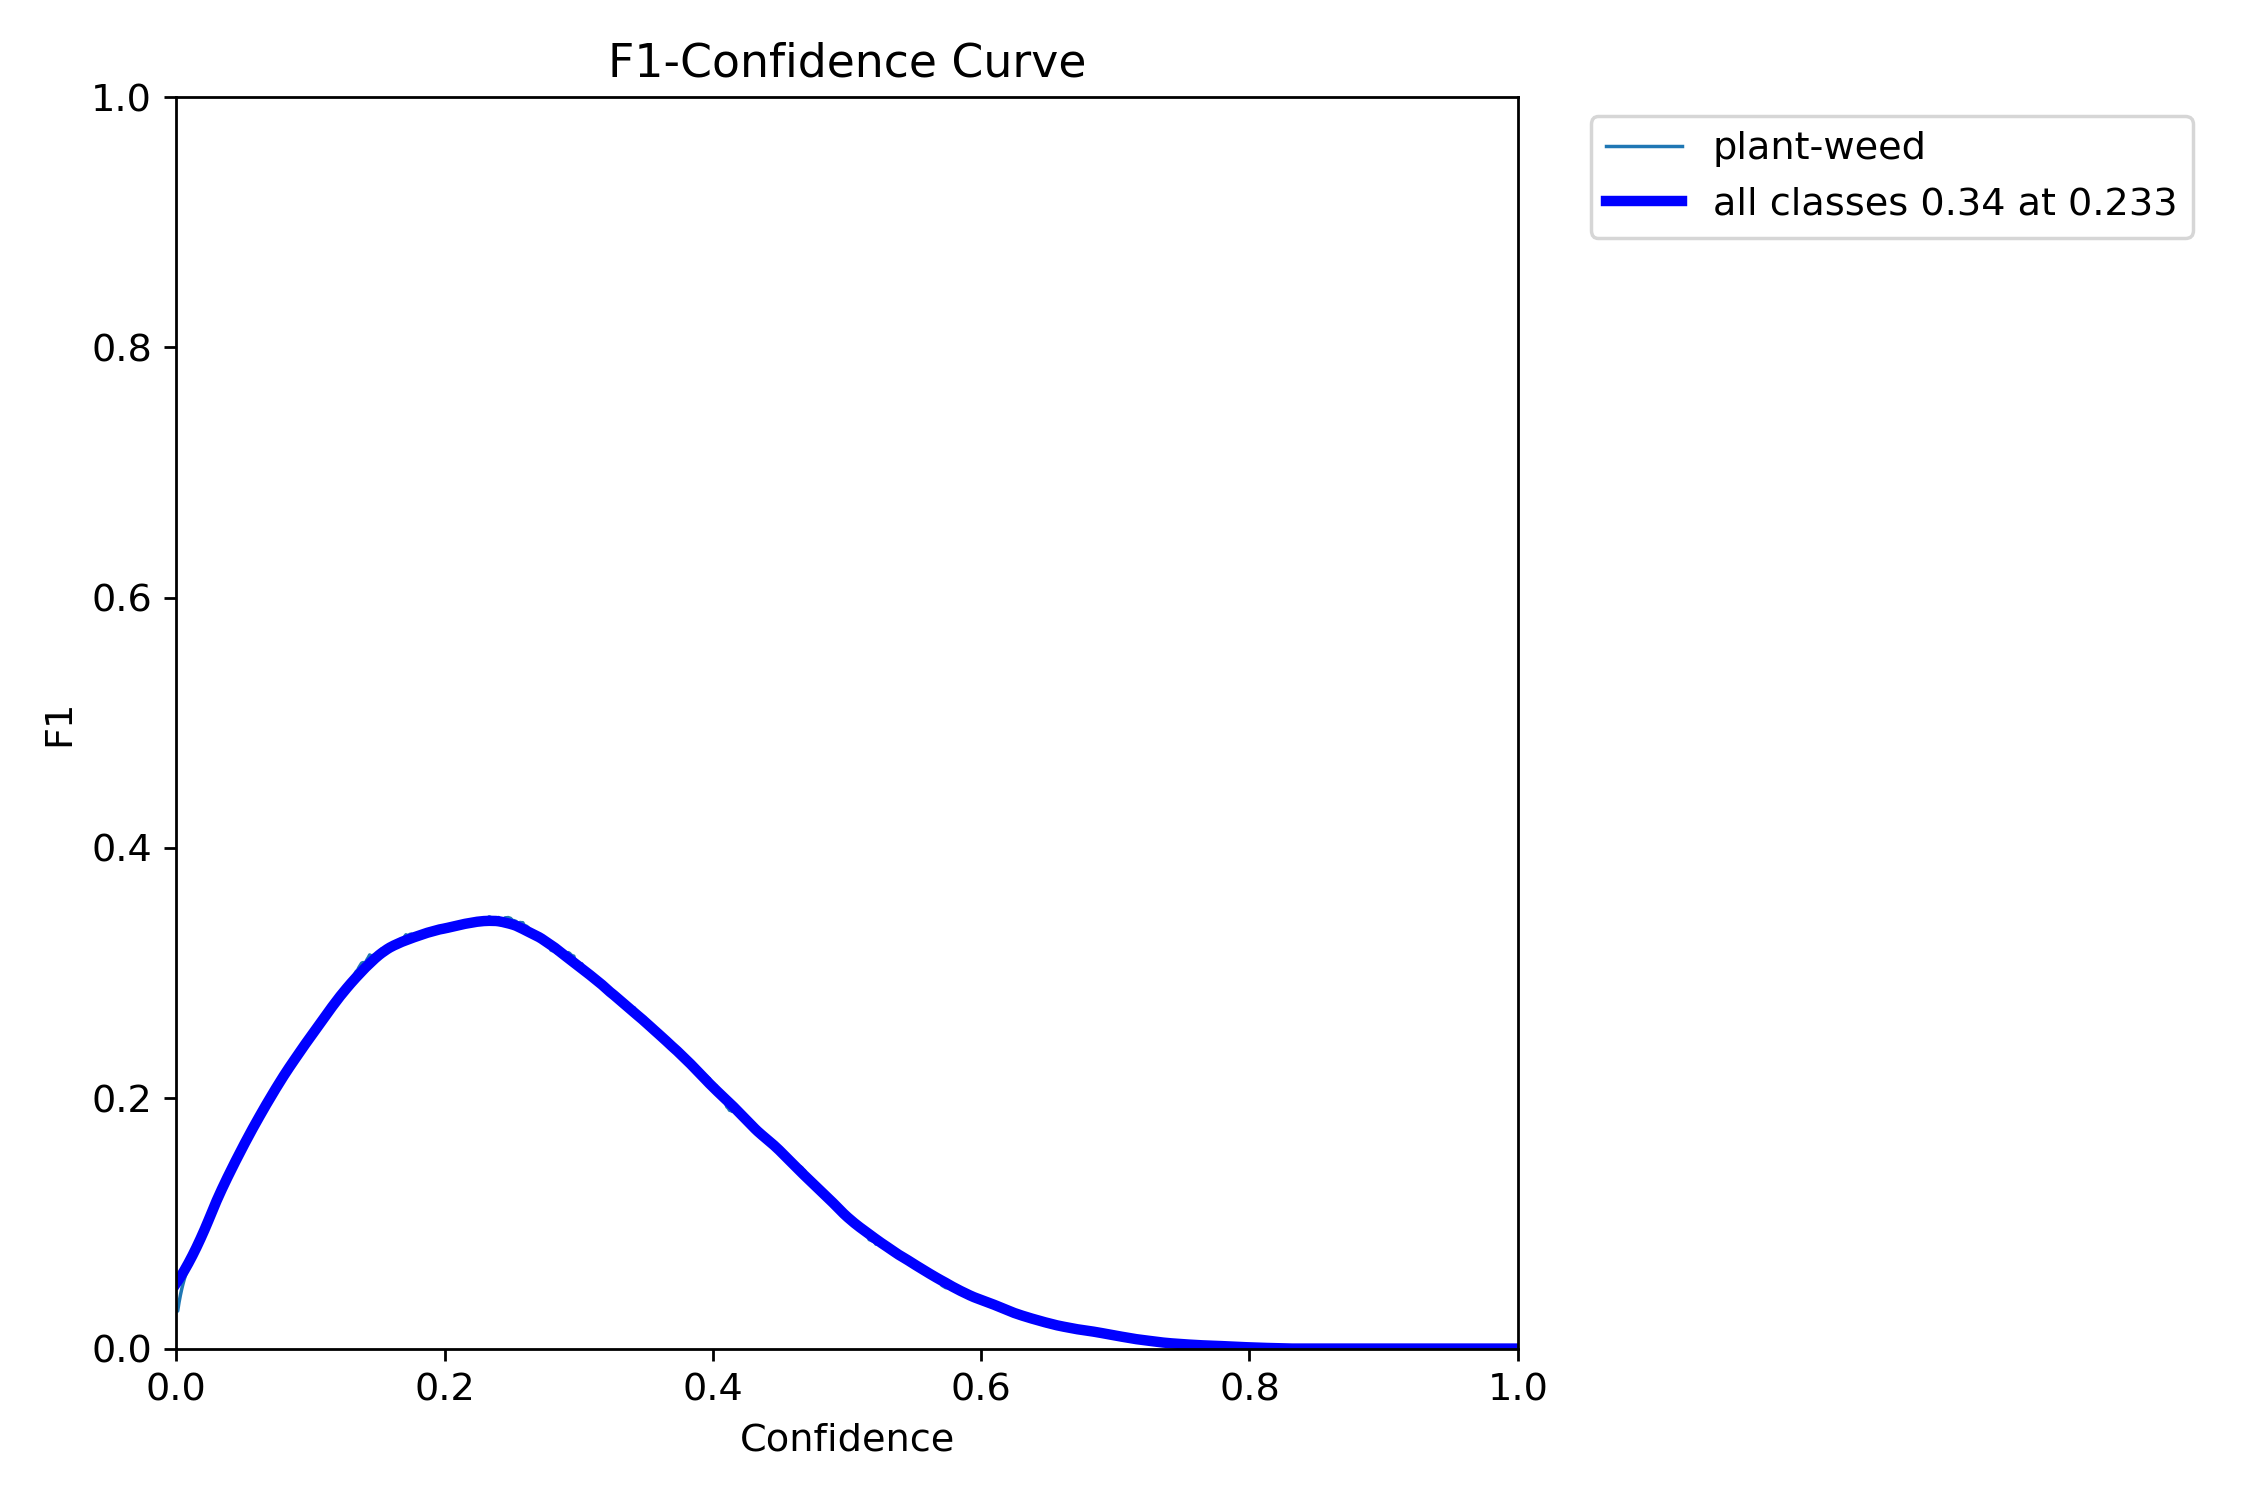

In [68]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

    - Las métricas de pérdida de entrenamiento se mantienen altas y sin una tendencia clara de mejora. Esto indica que el modelo no está convergiendo eficientemente.
    - La pérdida de validación también es alta y no muestra una reducción progresiva significativa. Similar a las pérdidas de entrenamiento, esto sugiere que el modelo no está generalizando bien a nuevos datos.
    - No se observa un aprendizaje efectivo en el modelo, lo que puede indicar que el entrenamiento no ha sido óptimo. La falta de una disminución constante en ambas pérdidas sugiere que el modelo tiene dificultades para aprender los patrones de los datos.

2. **Métricas de validación (Precisión, Recall, mAP)**

    - Precisión (metrics/precision(B)): Alrededor de 0.35, lo que indica un alto número de falsos positivos. Esto significa que el modelo realiza muchas detecciones incorrectas.
    - Recall (metrics/recall(B)): Alrededor de 0.31-0.32, sugiriendo una gran cantidad de falsos negativos. Esto implica que el modelo no está detectando muchos de los objetos reales.
    - mAP50 (metrics/mAP50(B)): Cercano a 0.22-0.25, lo que sugiere que el modelo no está realizando detecciones confiables. El bajo mAP50 indica un rendimiento deficiente en la detección de objetos.
    - La alta tasa de falsos negativos y la baja precisión indican que el modelo no está generalizando bien. Estos resultados confirman que el modelo tiene dificultades para realizar predicciones precisas y detectar una gran proporción de los objetos reales.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

    - El LR es dinámico, aumenta progresivamente hasta 0.000557 en la Epoch 5, y luego disminuye gradualmente.
    - Esto sugiere que el LR fue diseñado para aumentar inicialmente, explorando el espacio de parámetros, y luego disminuir para refinar la convergencia.
    - Sin embargo, su comportamiento errático durante las primeras epochs podría haber afectado la convergencia. Un LR inestable en las primeras epochs puede haber impedido un aprendizaje efectivo, contribuyendo a la falta de mejora en las pérdidas y métricas.

#### Observaciones
- El modelo no muestra signos de aprendizaje efectivo. Las pérdidas de entrenamiento y validación son altas y fluctuantes, y las métricas de validación son bajas.
- El modelo tiene dificultades para generalizar a nuevos datos, como lo indica la falta de disminución en las pérdidas de validación y las bajas métricas de precisión y recall.
- El modelo muestra un bajo rendimiento en la detección de objetos, con una alta tasa de falsos negativos y falsos positivos.
- El esquema de programación del learning rate, aunque dinámico, no fue efectivo en este caso debido a su comportamiento errático inicial.

----

## Experiment 15 *(medium weed)*
### *3m | 60º+90º | mid*

In [29]:
folder = "train3/"

In [30]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  370.712         1.75143         1.27127         1.33133   
96     97  373.958         1.74814         1.24333         1.31370   
97     98  377.808         1.76302         1.24645         1.32142   
98     99  381.783         1.77293         1.25364         1.31736   
99    100  385.084         1.73882         1.23113         1.30294   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.41616            0.36675           0.31112   
96               0.42113            0.36491           0.31377   
97               0.41815            0.36879           0.32322   
98               0.42100            0.37143           0.32719   
99               0.42395            0.37245           0.32803   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.10607       2.43411       1.56370       1.74931  0.000119   
96              0.10712       2.43702       1.55823       1.74691  0.000099   
97              0.11058       2.42739       1.54375       1.73380  0.000079   
98              0.11110       2.42786       1.54079       1.73129  0.000060   
99              0.11076       2.42969       1.54129       1.73093  0.000040   

      lr/pg1    lr/pg2  
95  0.000119  0.000119  
96  0.000099  0.000099  
97  0.000079  0.000079  
98  0.000060  0.000060  
99  0.000040  0.000040

In [54]:
last_row = df3.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 6.418 min


In [55]:
TP = 1740
FP = 1569
FN = 3168
base = TP+FP+FN
base

6477

In [56]:
TP/base, FP/base, FN/base

(0.2686428902269569, 0.24224177860120427, 0.4891153311718388)

### Graphs

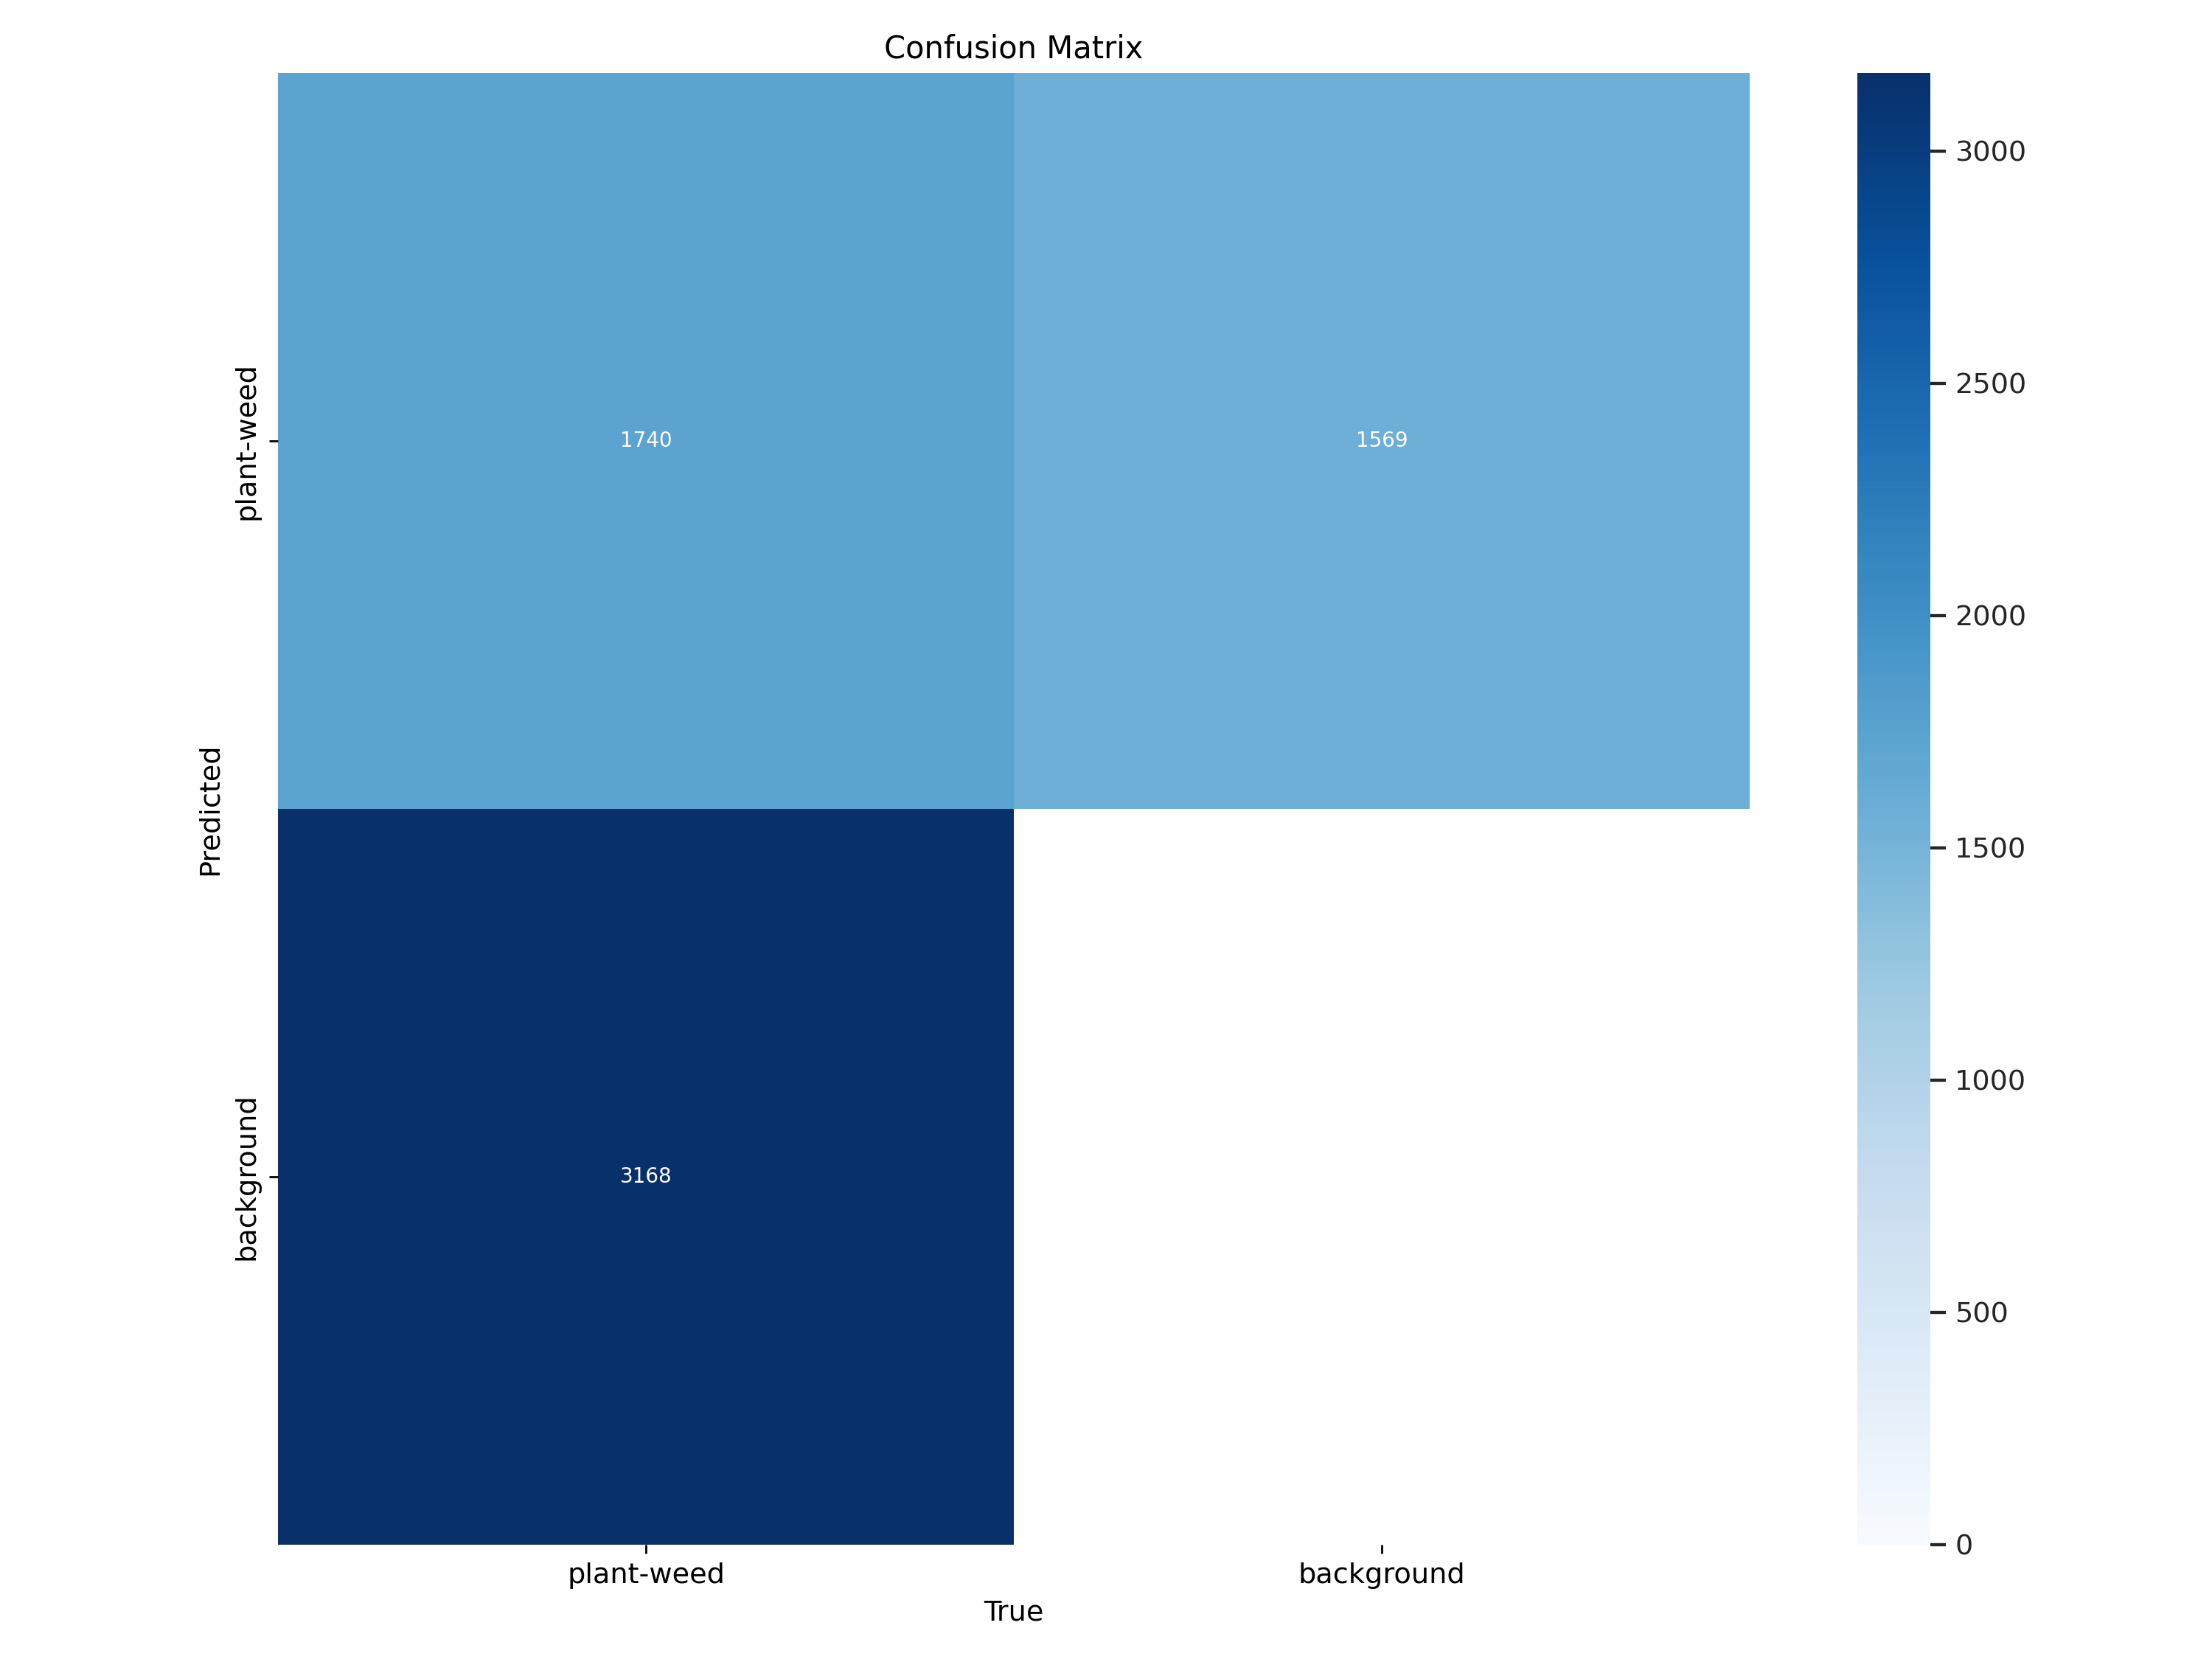

In [51]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

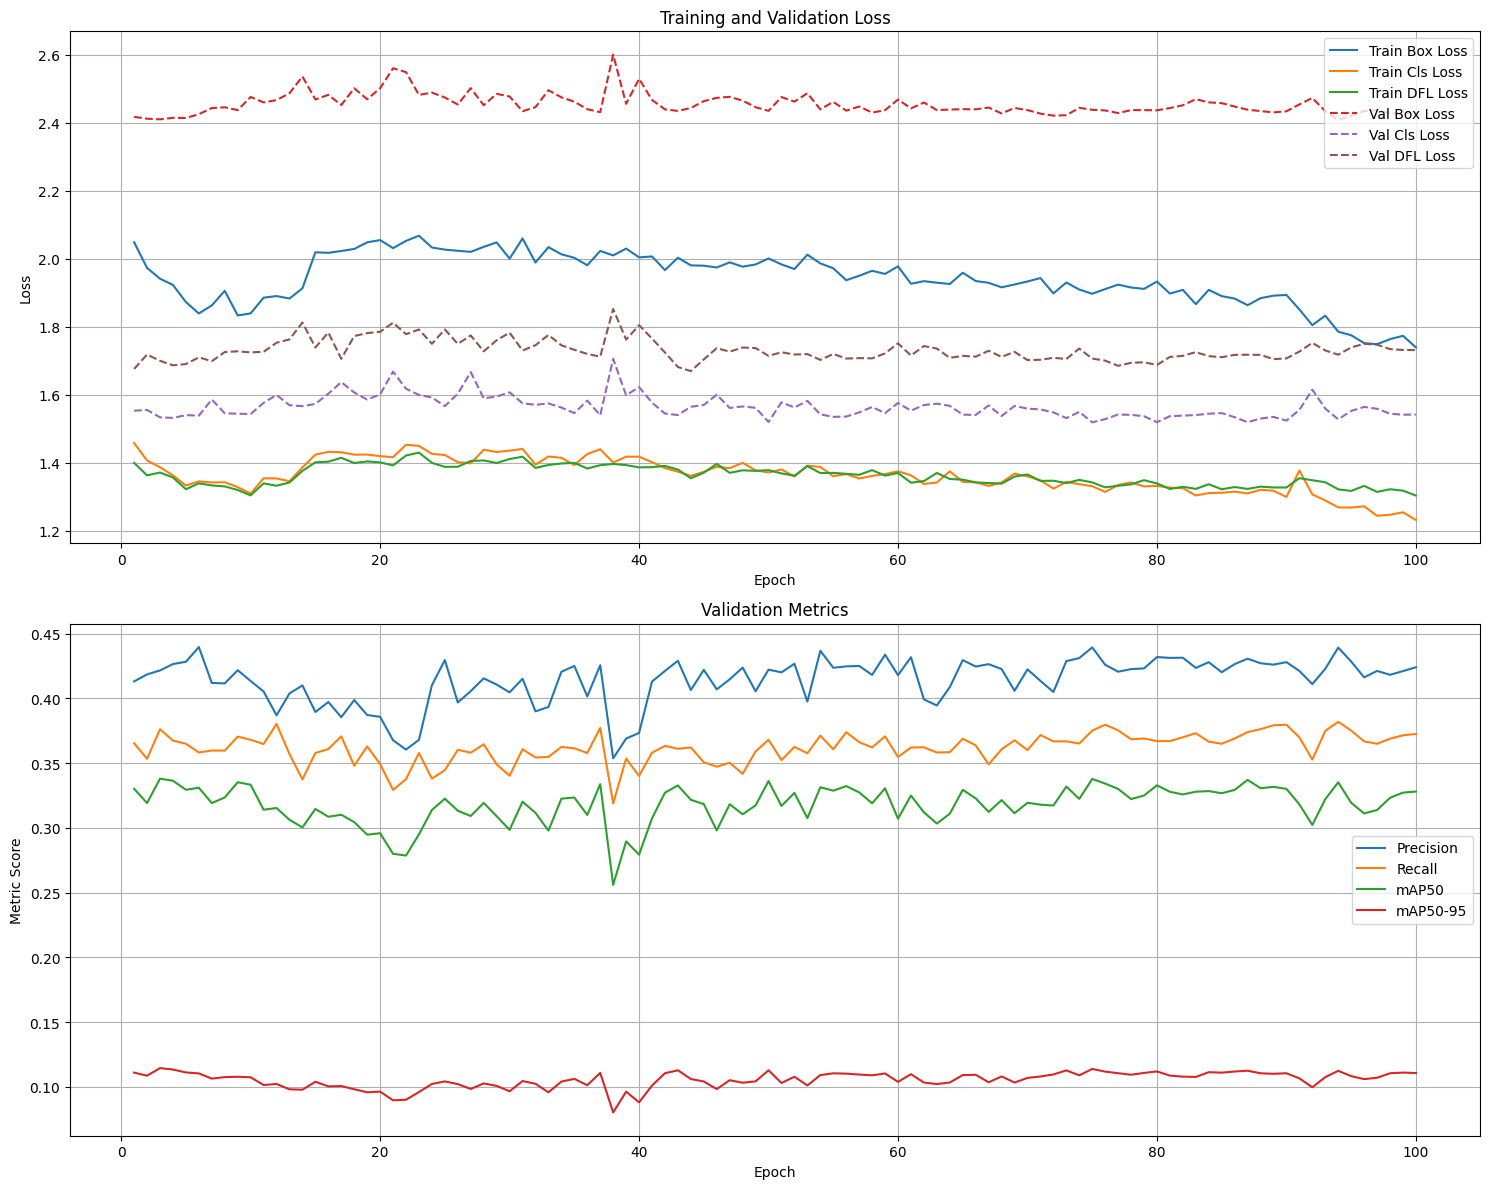

In [33]:
graph_training_metrics(df3, graph="full")

In [34]:
graph_LrLoss_3D(df3)

Validation set


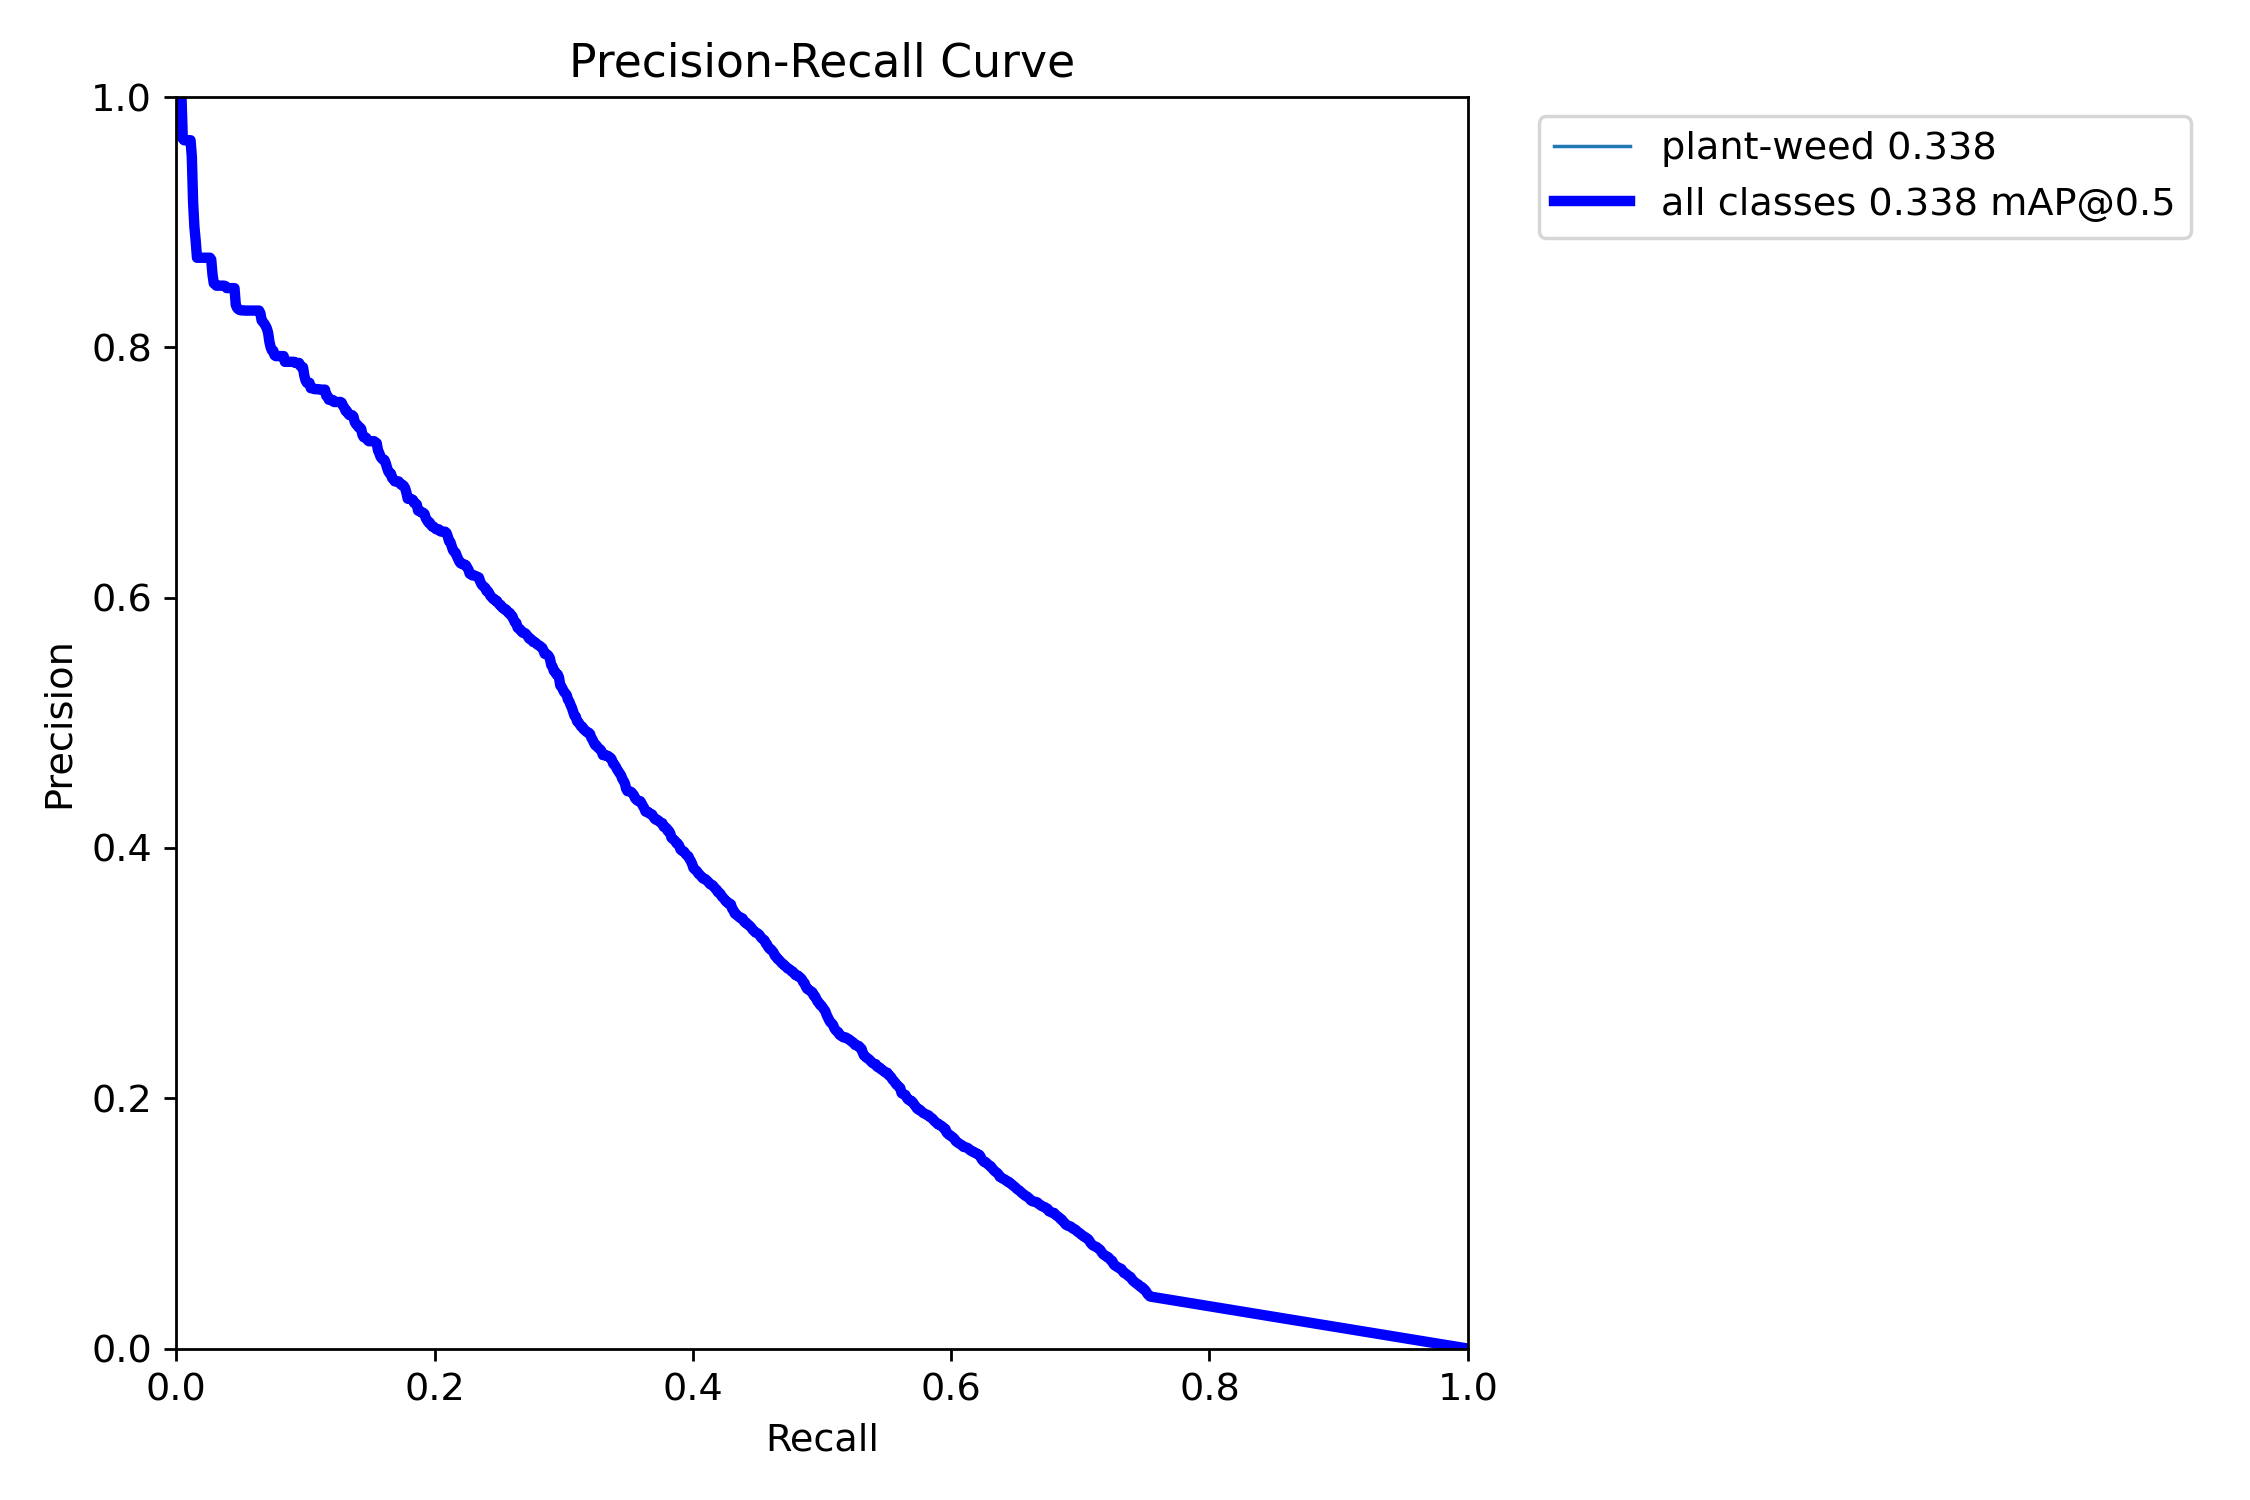

In [35]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

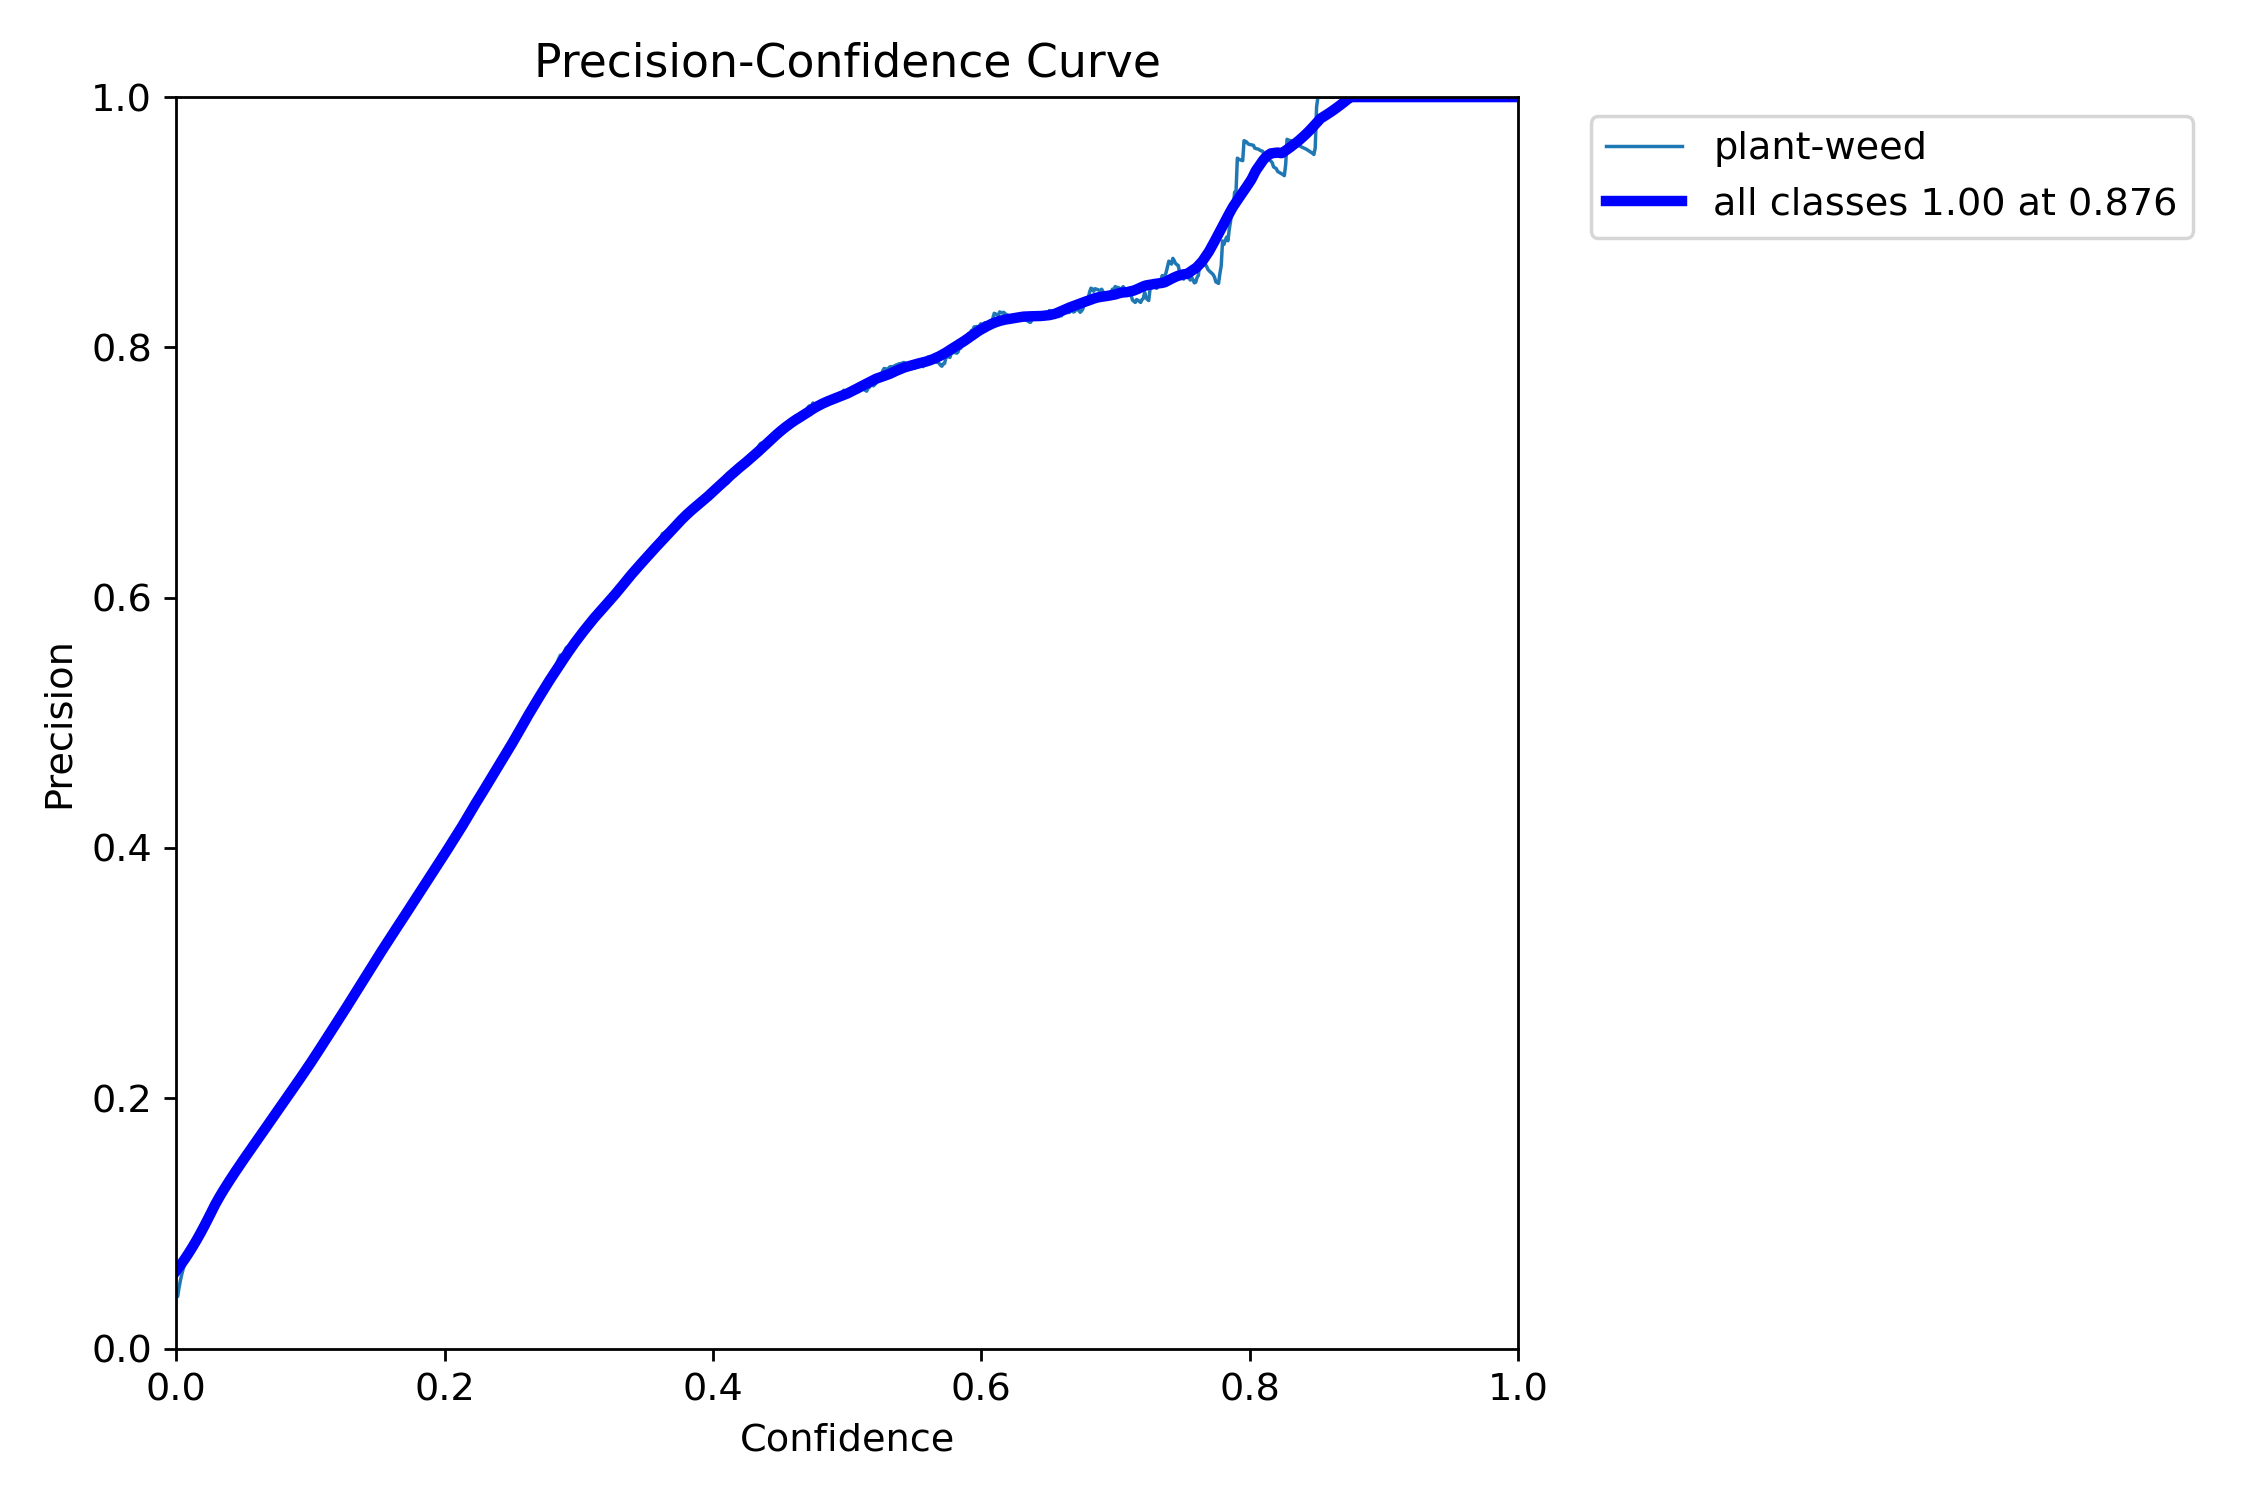

In [36]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

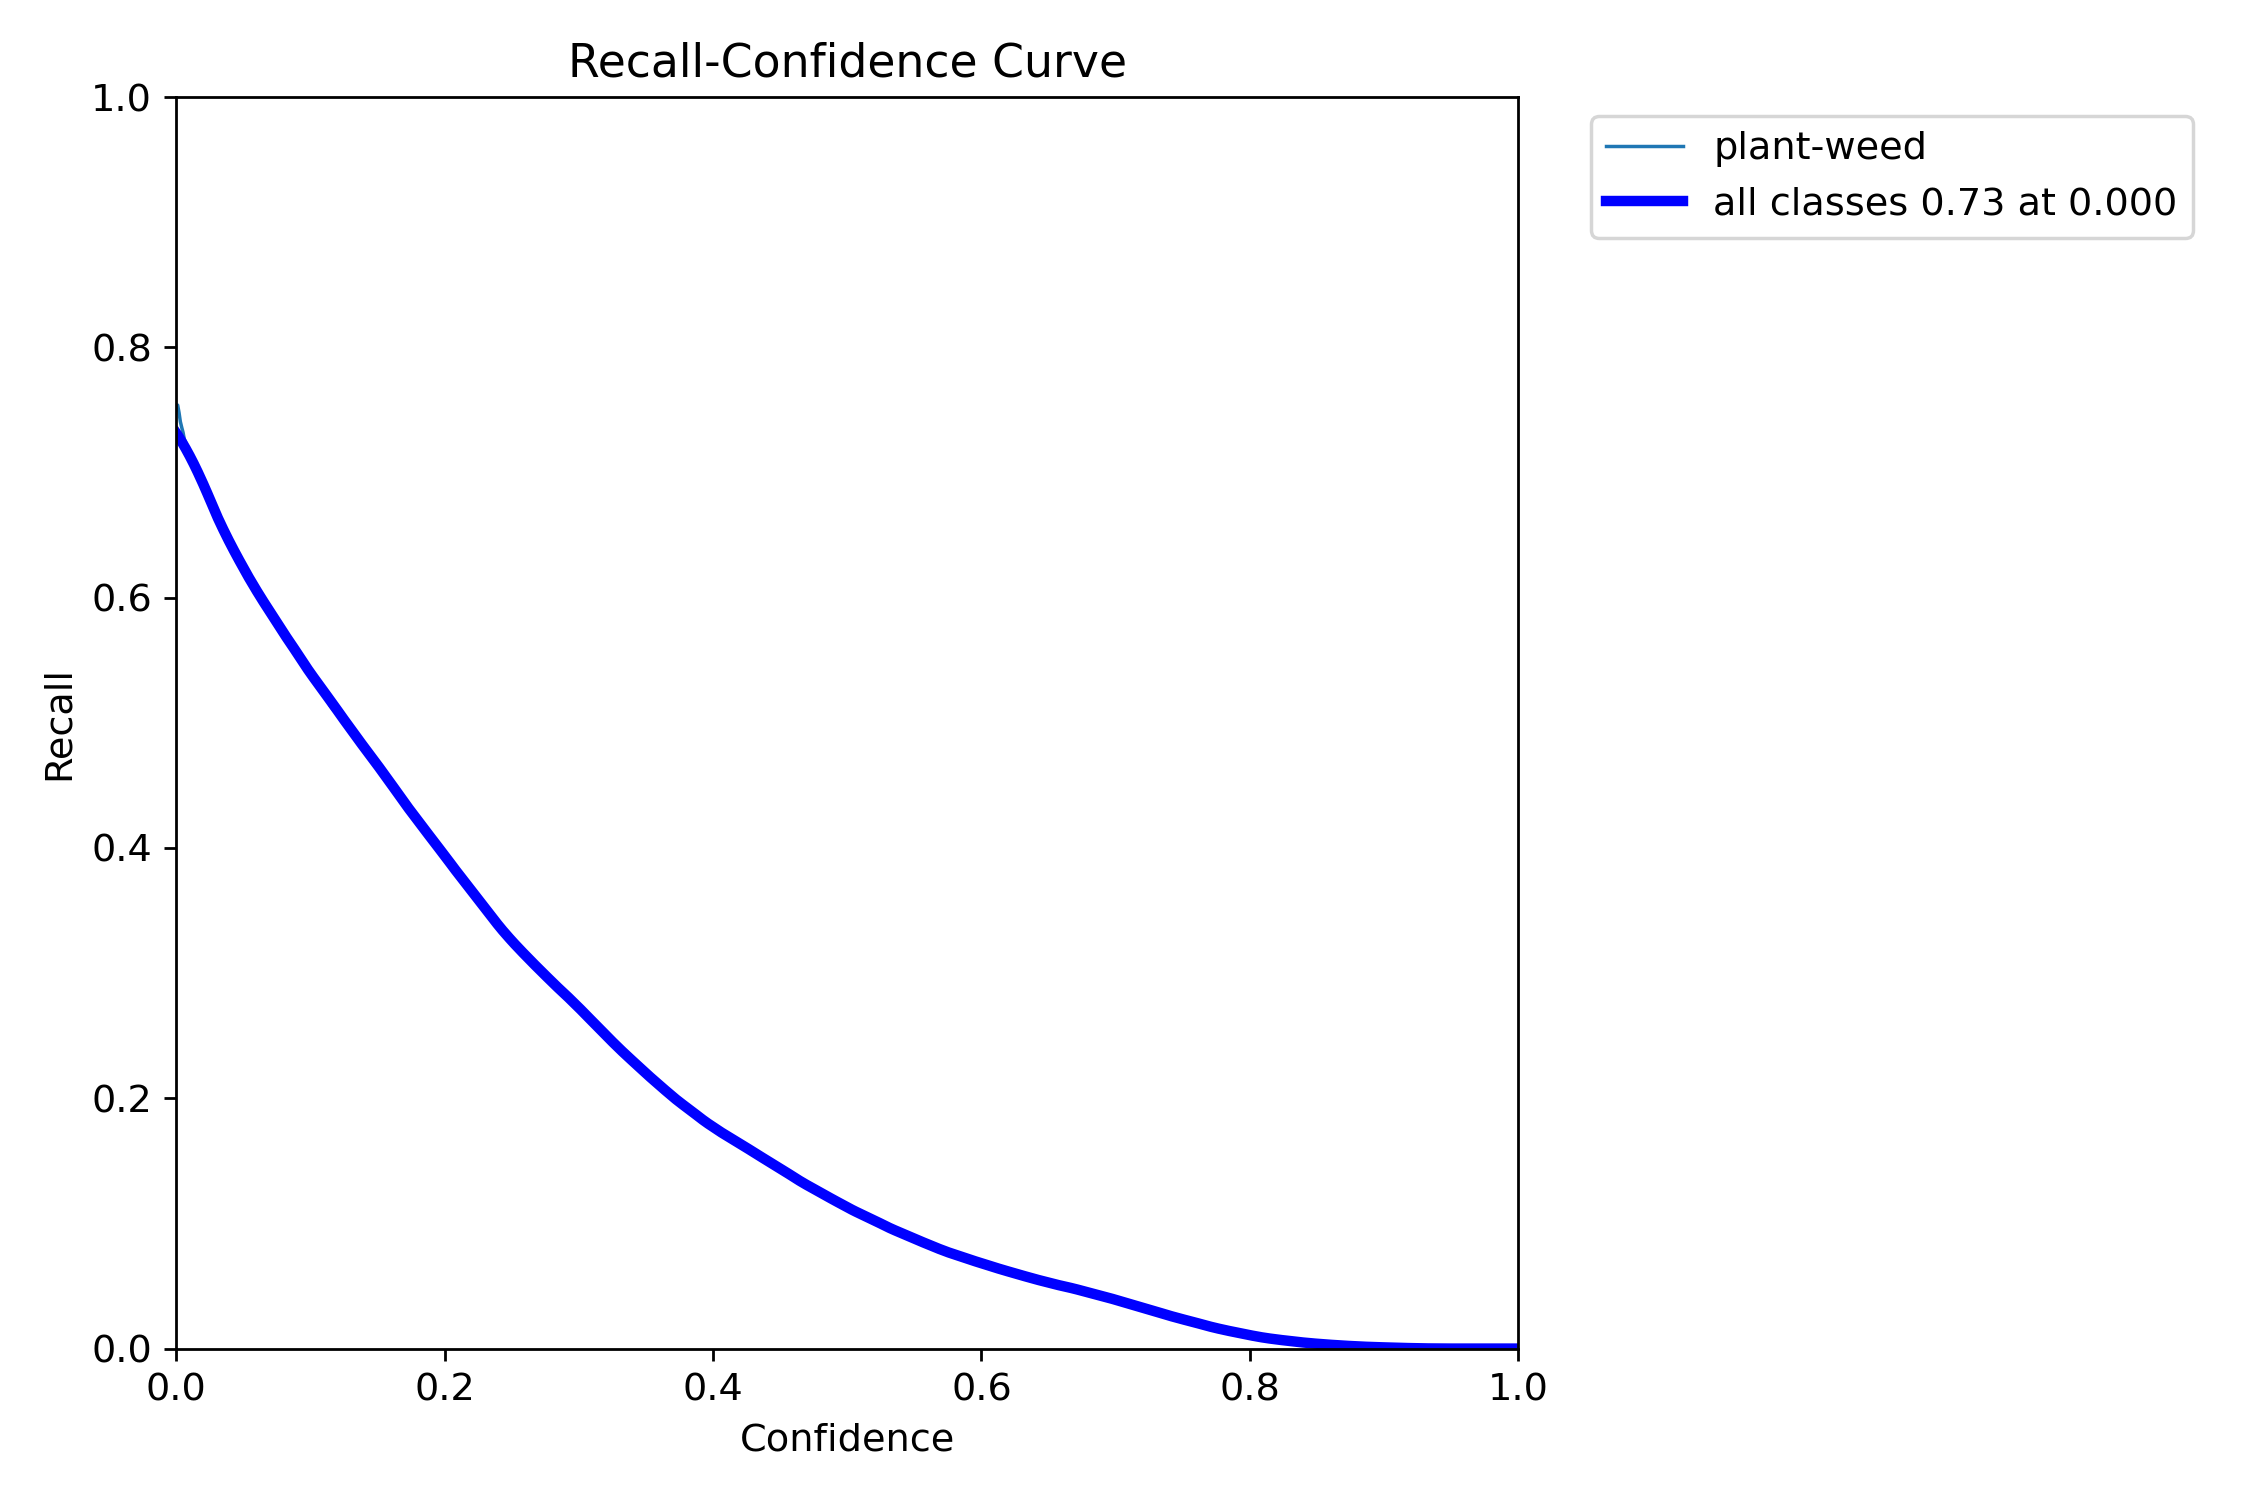

In [37]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

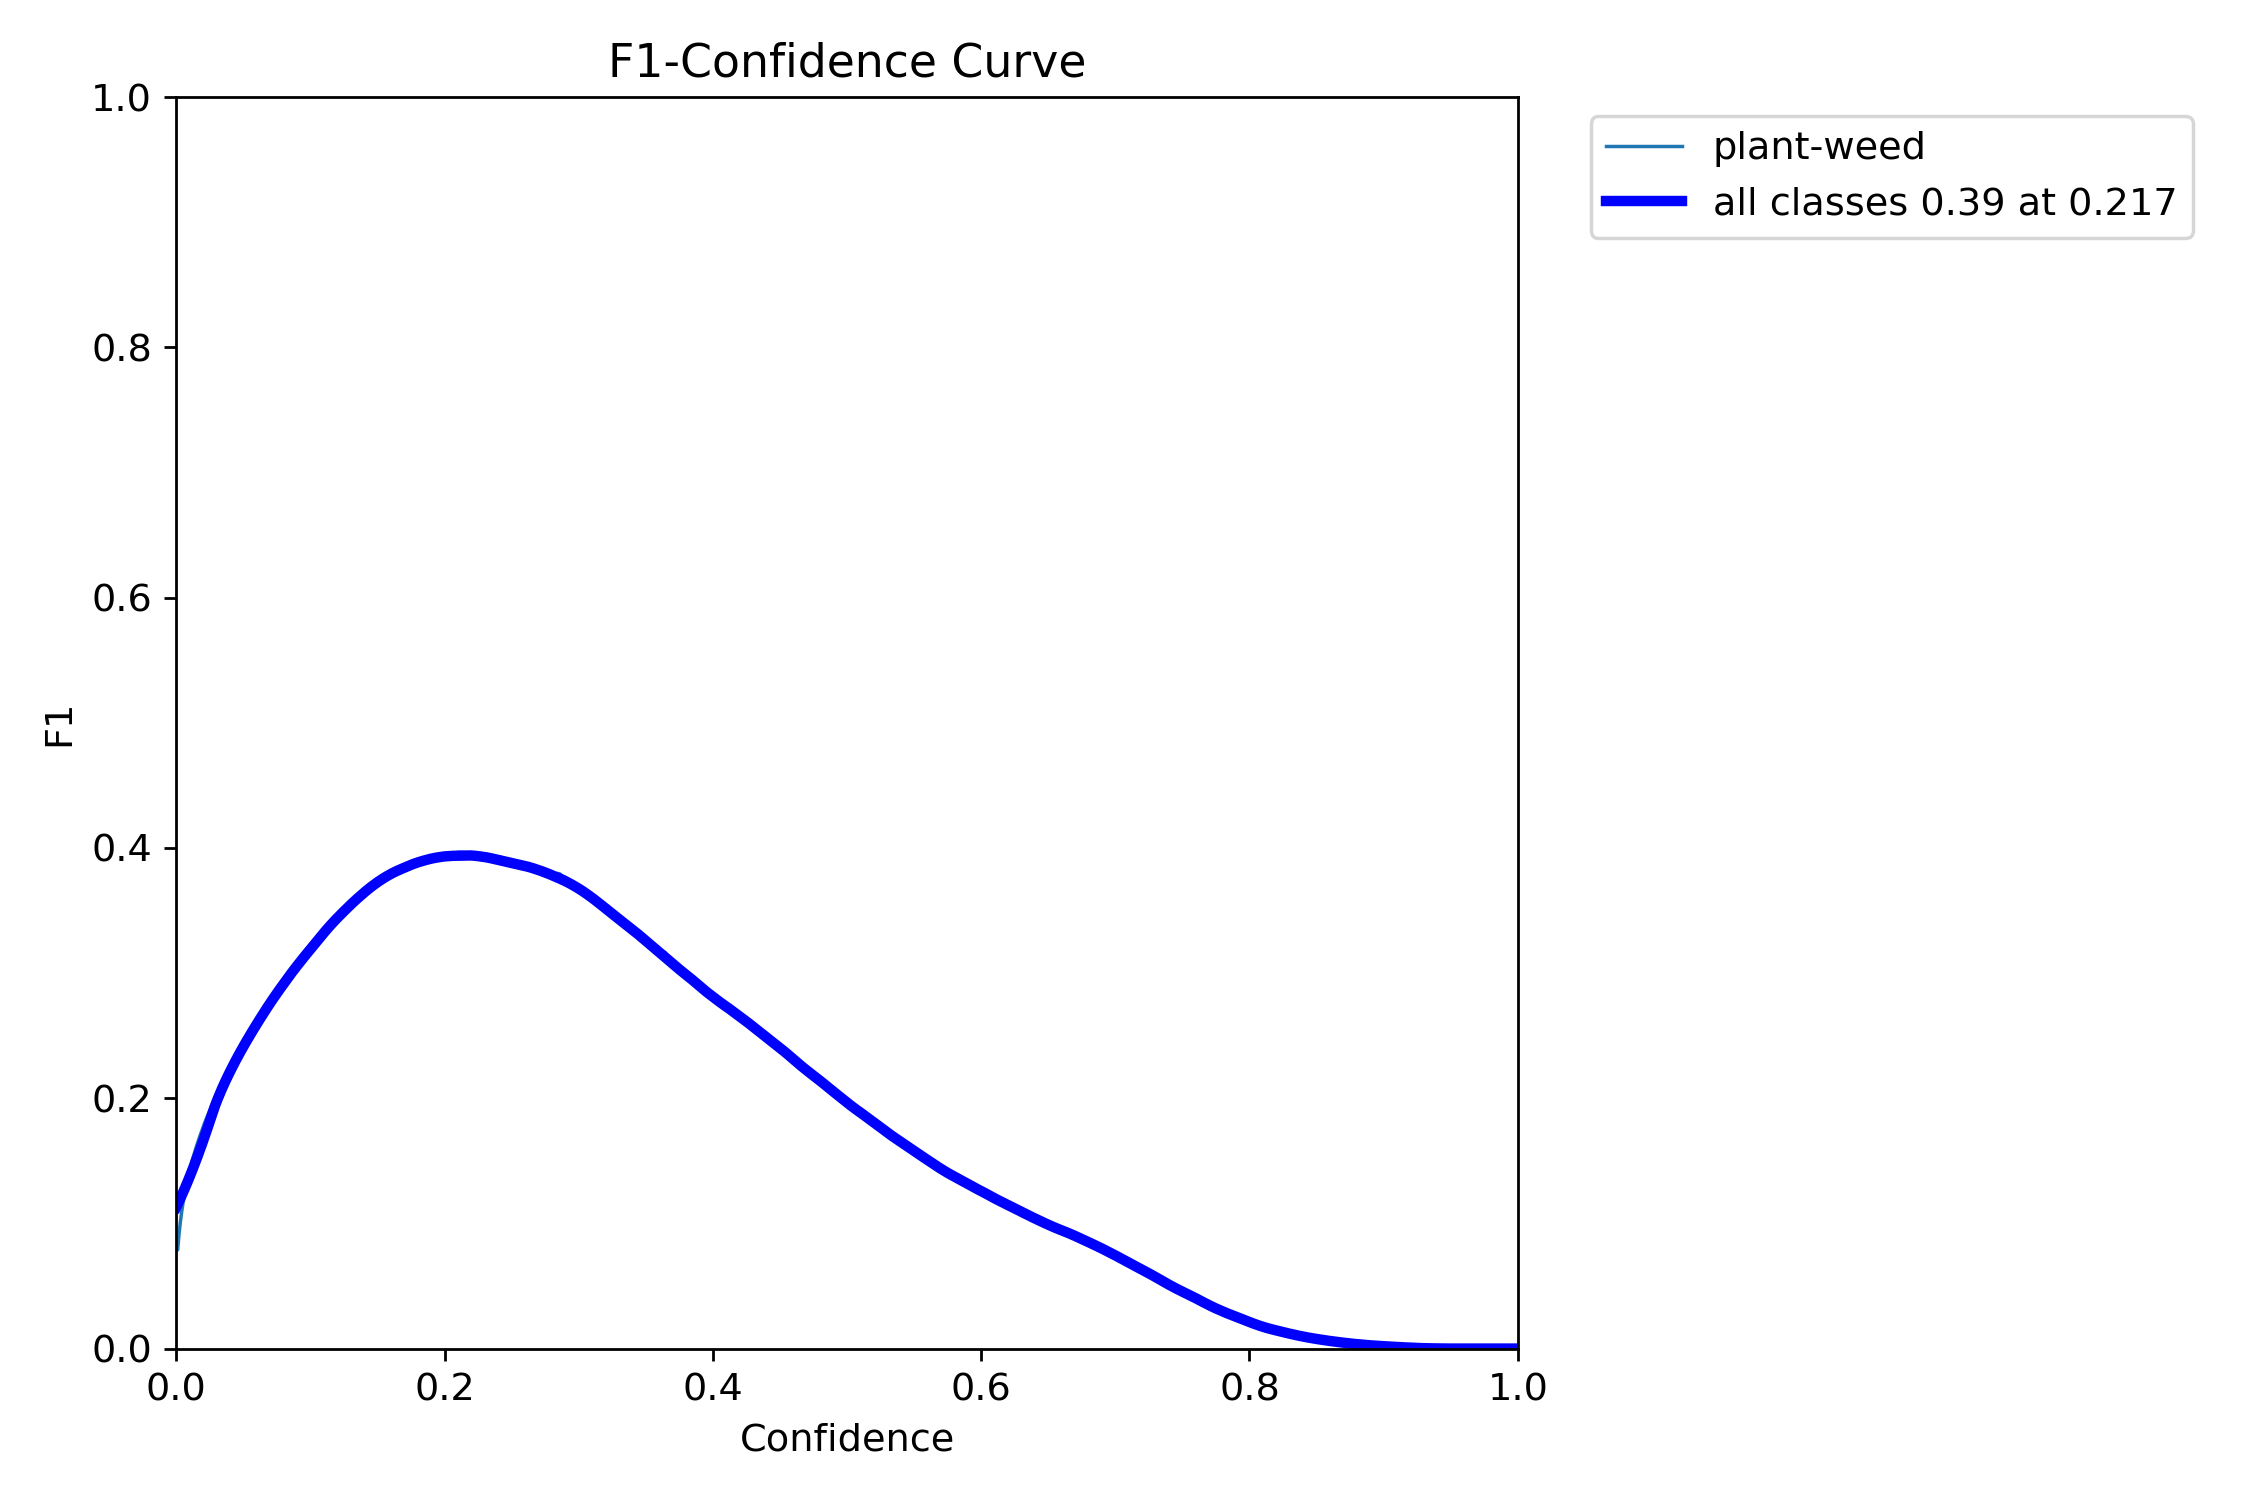

In [38]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

    - Las pérdidas de entrenamiento y validación muestran fluctuaciones a lo largo de las épocas, lo que indica que el modelo no converge de manera estable.
    - La falta de una tendencia clara de disminución en las pérdidas sugiere que el modelo no está aprendiendo eficazmente a partir de los datos.

2. **Métricas de validación (Precisión, Recall, mAP)**

    - El valor de mAP50 es relativamente bajo, lo que indica que el modelo tiene dificultades para detectar objetos con alta precisión.
    - La precisión fluctúa, pero no muestra una mejora significativa a lo largo del entrenamiento. Esto significa que cuando el modelo detecta un objeto, no siempre es correcto. De manera similar, el recall también varía, lo que indica que el modelo no está capturando todos los objetos presentes en las imágenes.
    - El F1-score es bajo, lo que confirma el rendimiento deficiente del modelo en términos de equilibrio entre precisión y recall.
    - Se observa un alto número de falsos negativos (48,91%), lo que indica que el modelo está fallando en detectar una gran proporción de los objetos presentes. Tambien se observa un alto numero de falsos positivos (24,22%) lo cual indica que el modelo detecta objetos donde no los hay.
    - El modelo muestra un rendimiento deficiente, con dificultades para aprender de los datos y detectar objetos con precisión.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

    - El learning rate (lr/pg0) muestra variaciones significativas a lo largo del entrenamiento. Esto podría ser la causa de la inestabilidad observada en las pérdidas y métricas.
    - Un learning rate inestable puede impedir que el modelo converja hacia una solución óptima.
    - La inestabilidad en el learning rate podría ser un factor clave que contribuye a estos problemas.

#### Posibles Mejoras
- Experimentar con diferentes estrategias de learning rate, como el uso de un scheduler para reducir gradualmente el learning rate.
- Considerar la posibilidad de utilizar técnicas de regularización para mejorar la estabilidad del entrenamiento.

----

# Métricas generales

## Graphs

In [39]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

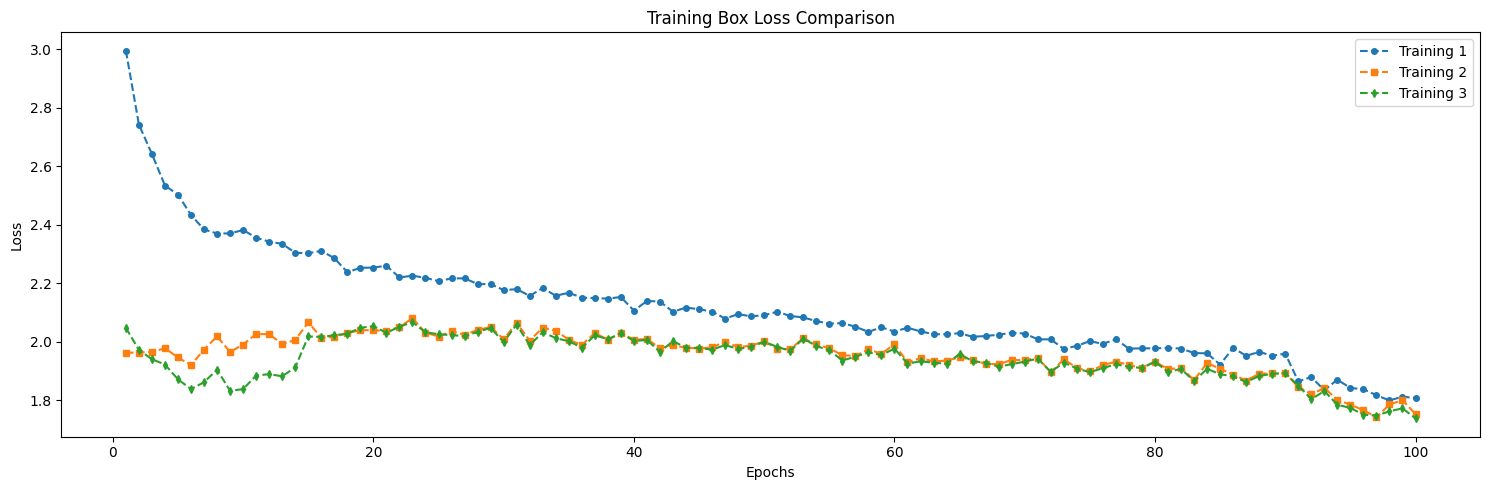

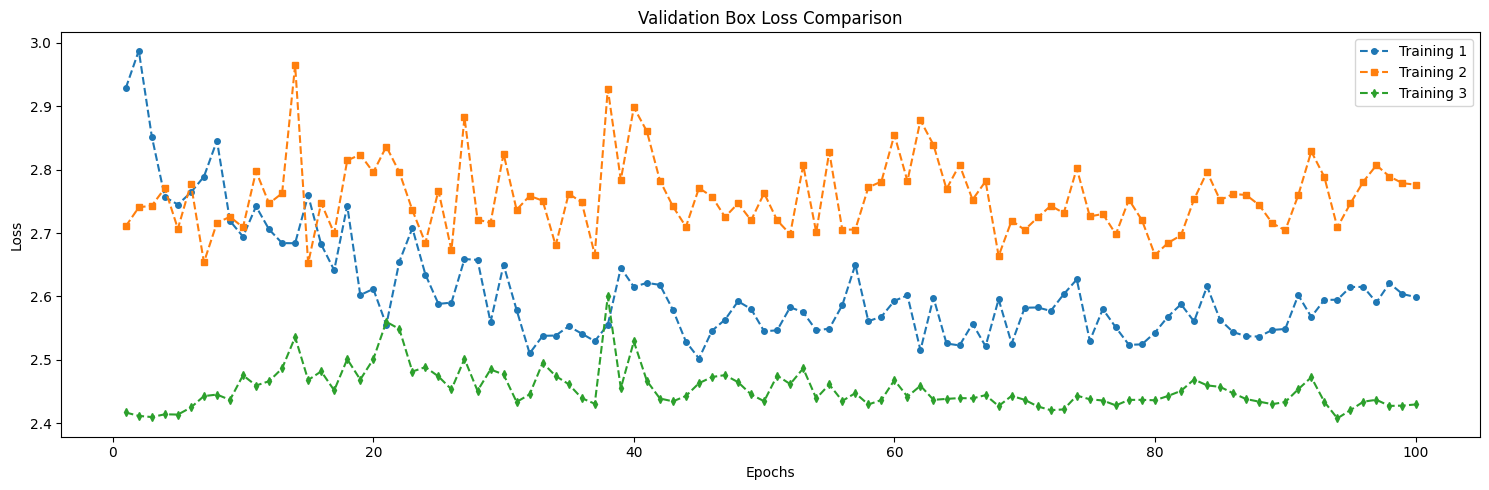

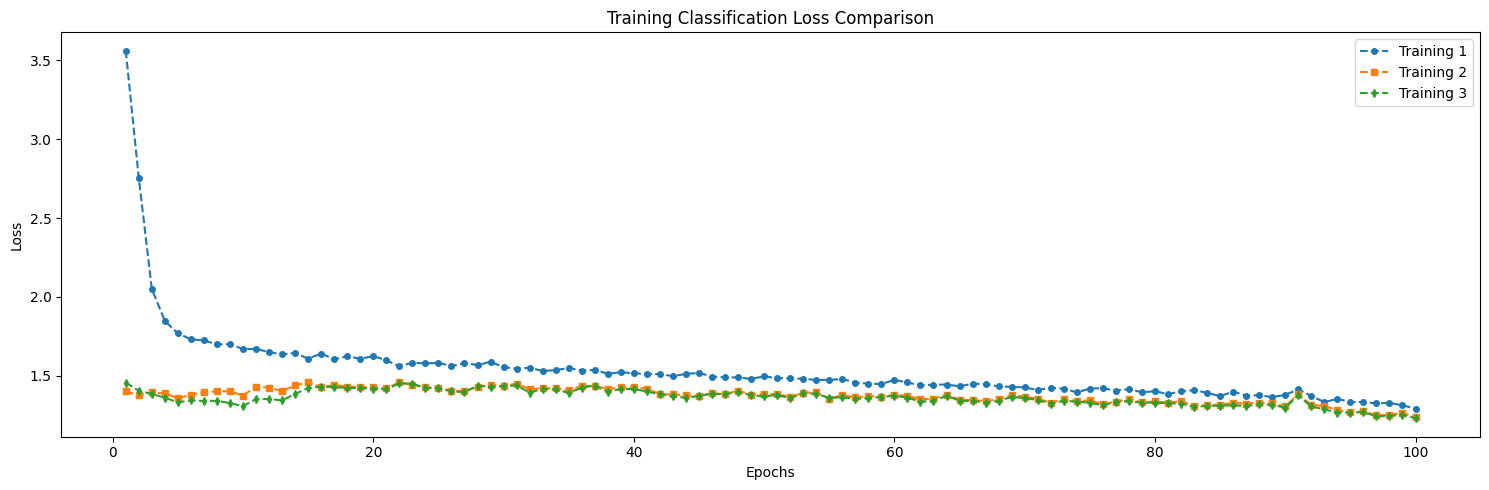

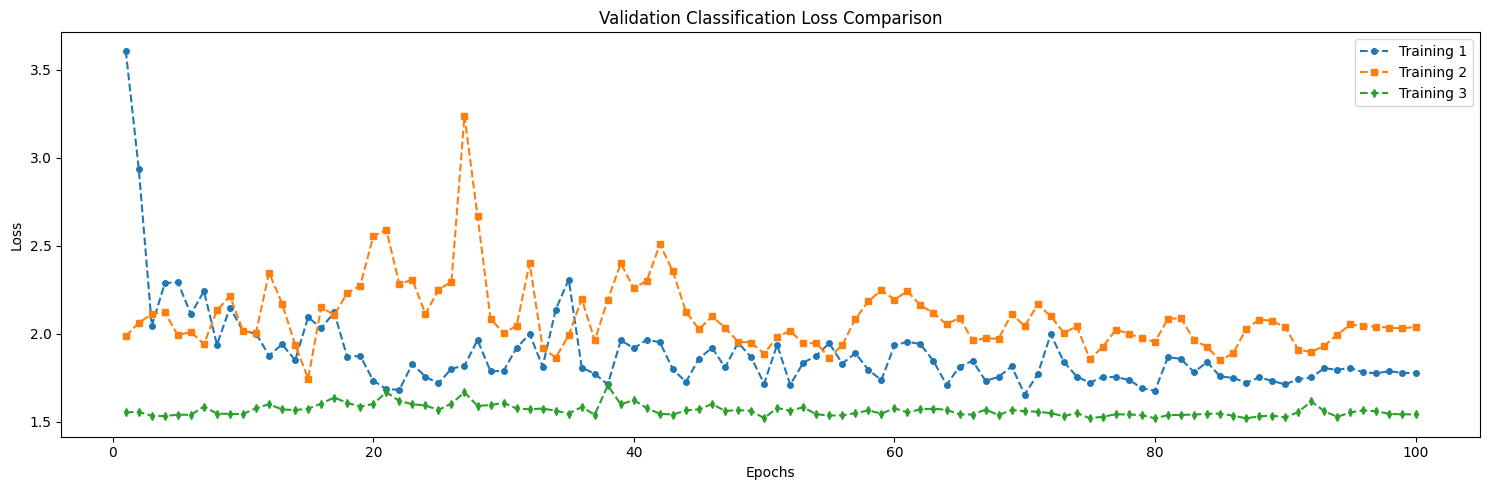

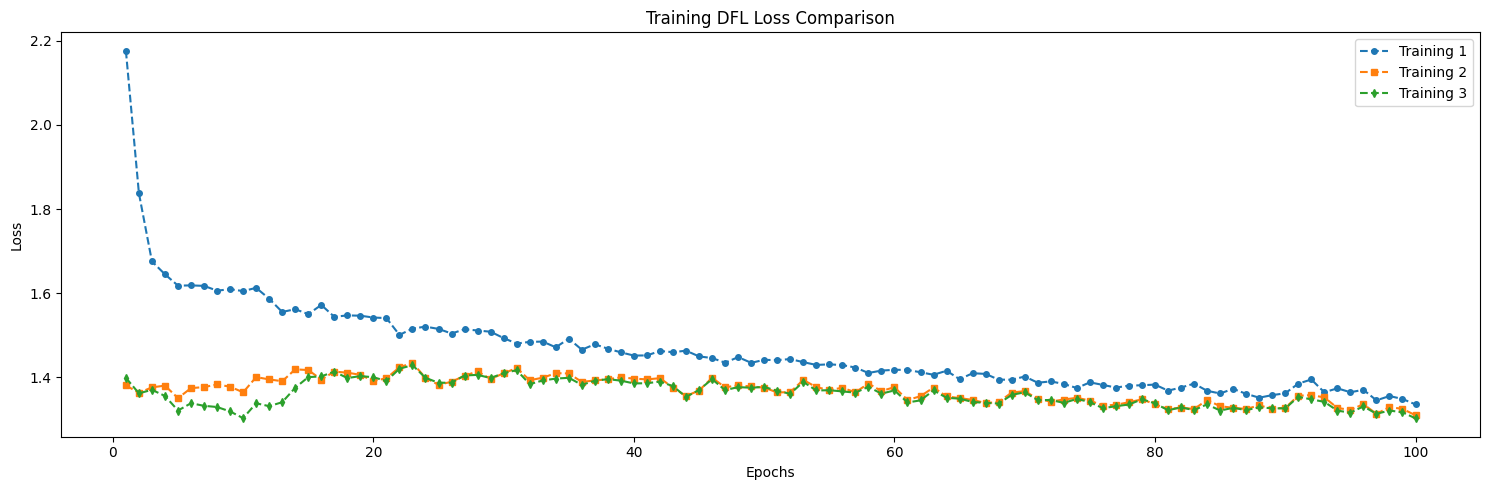

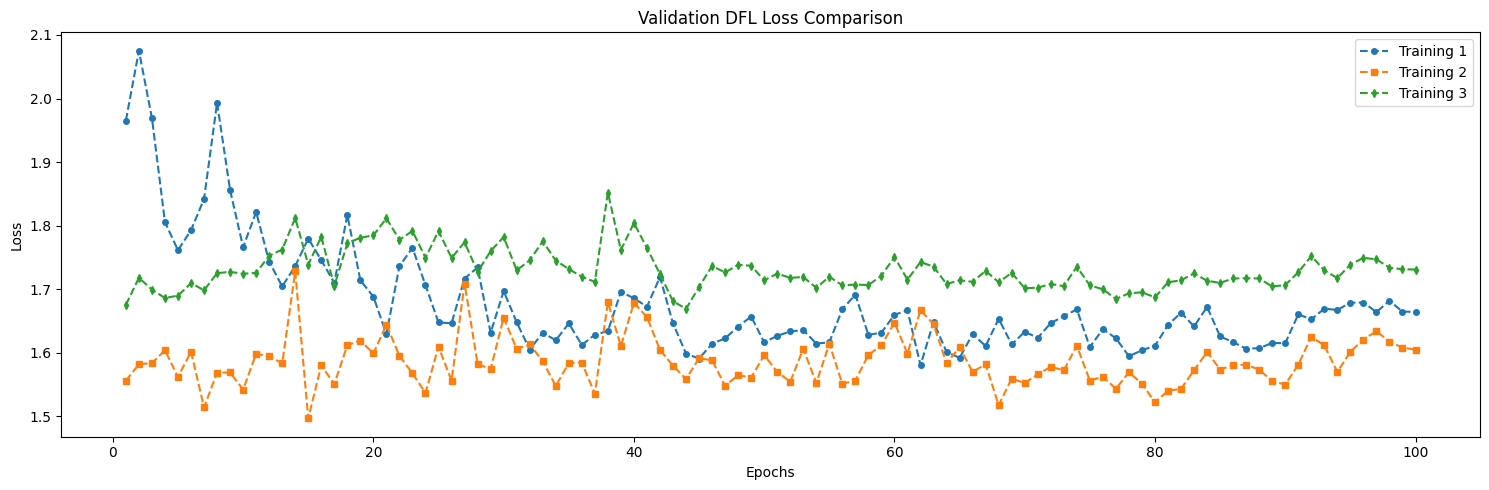

In [40]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

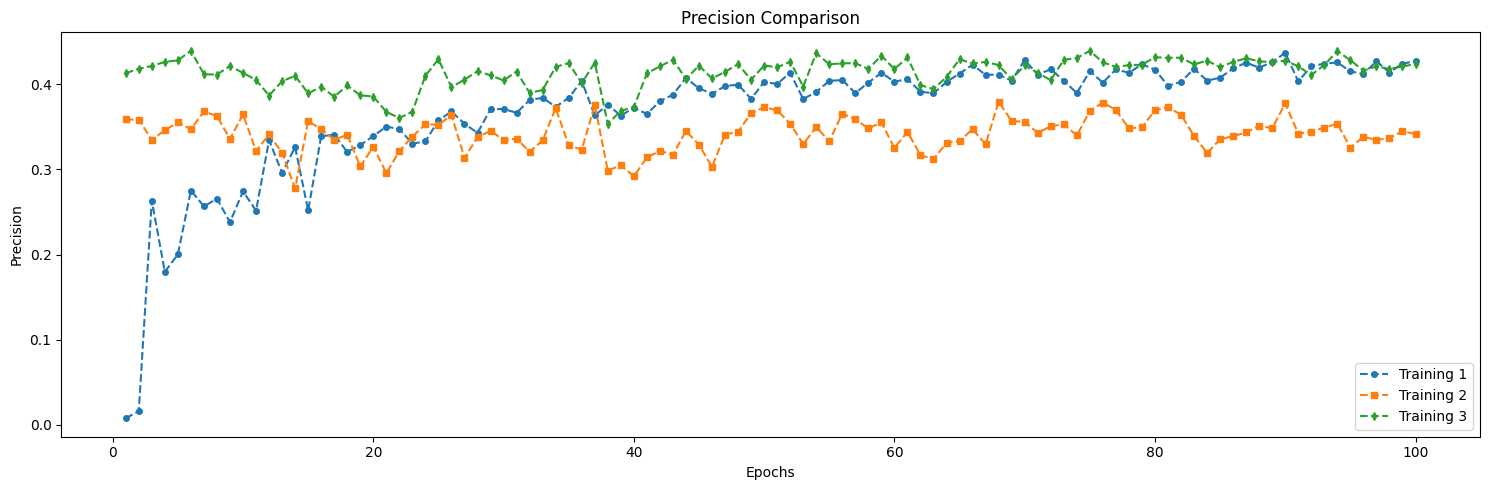

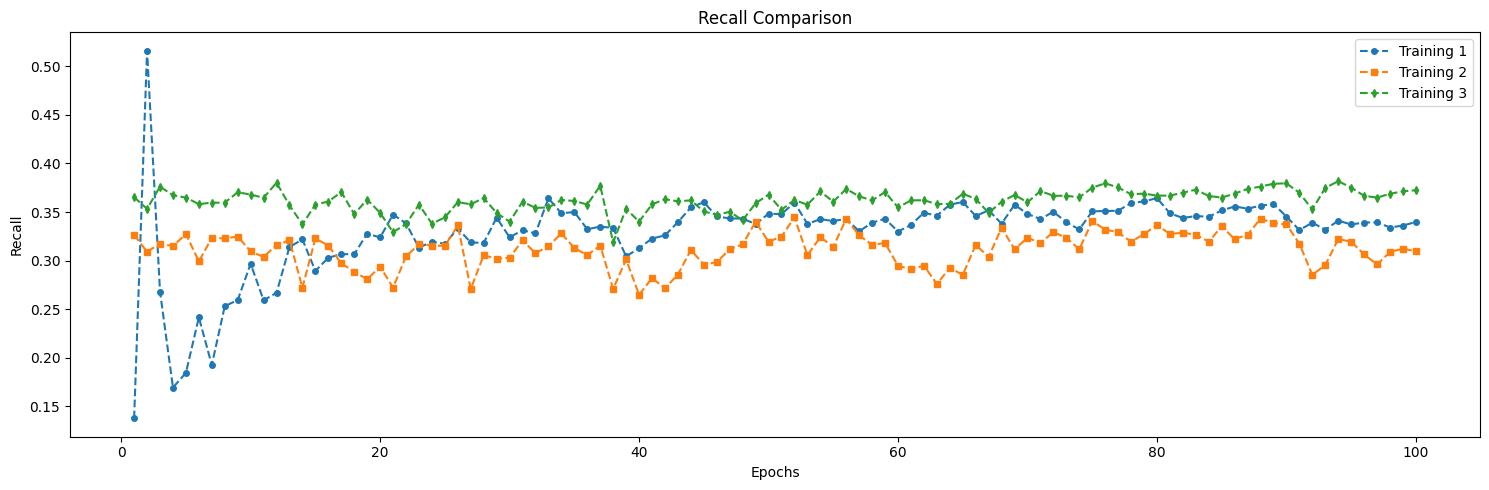

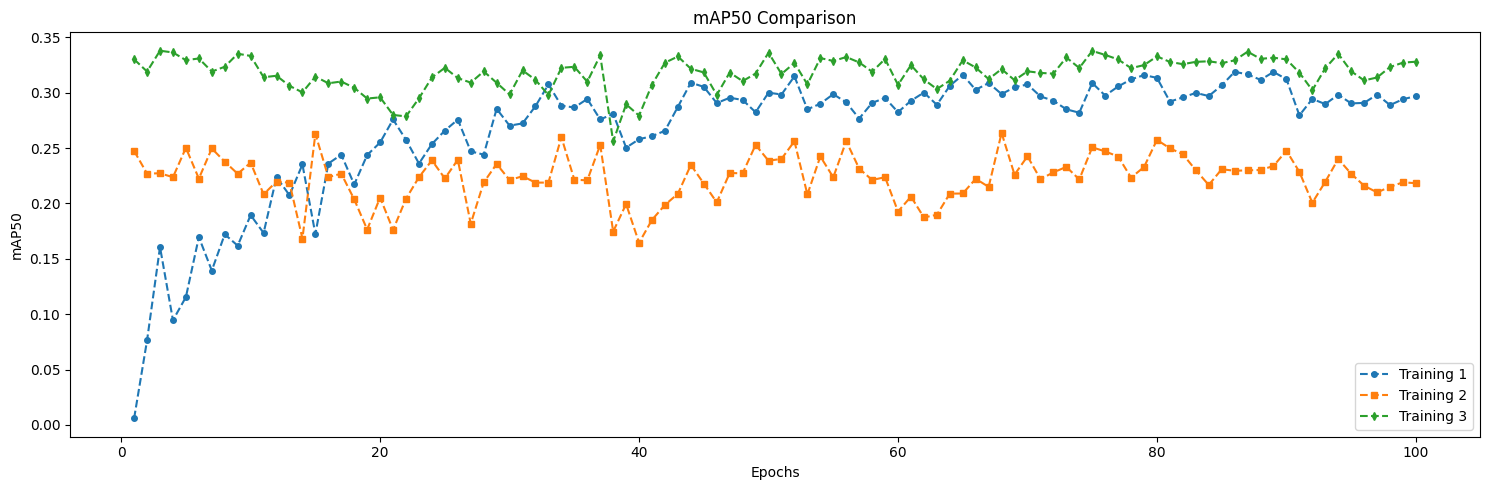

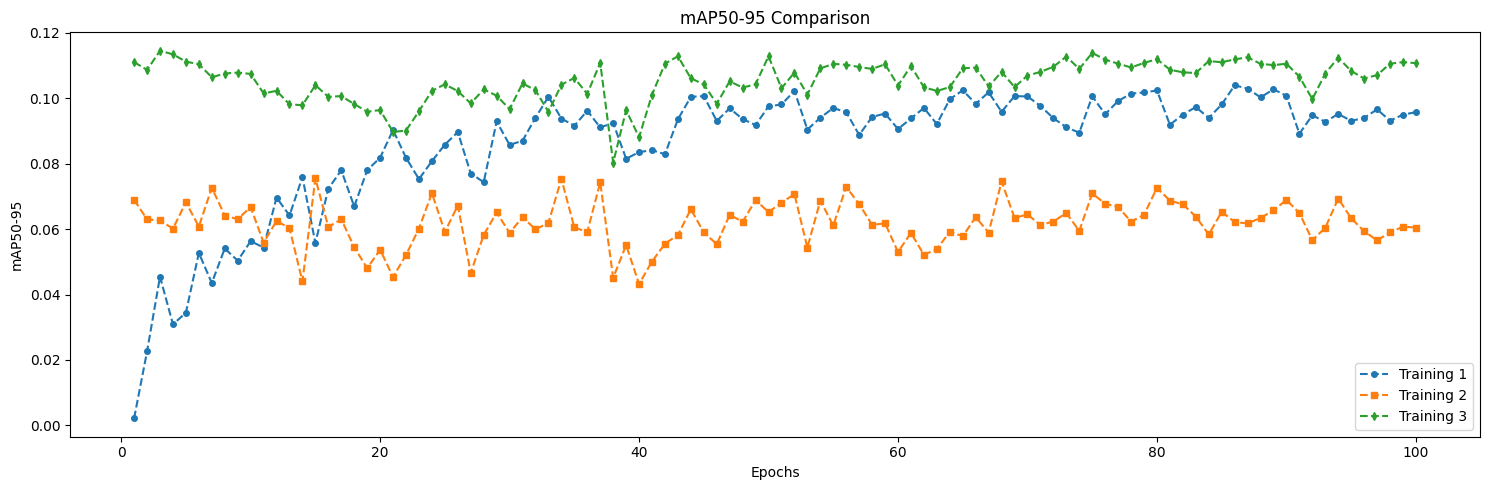

In [41]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

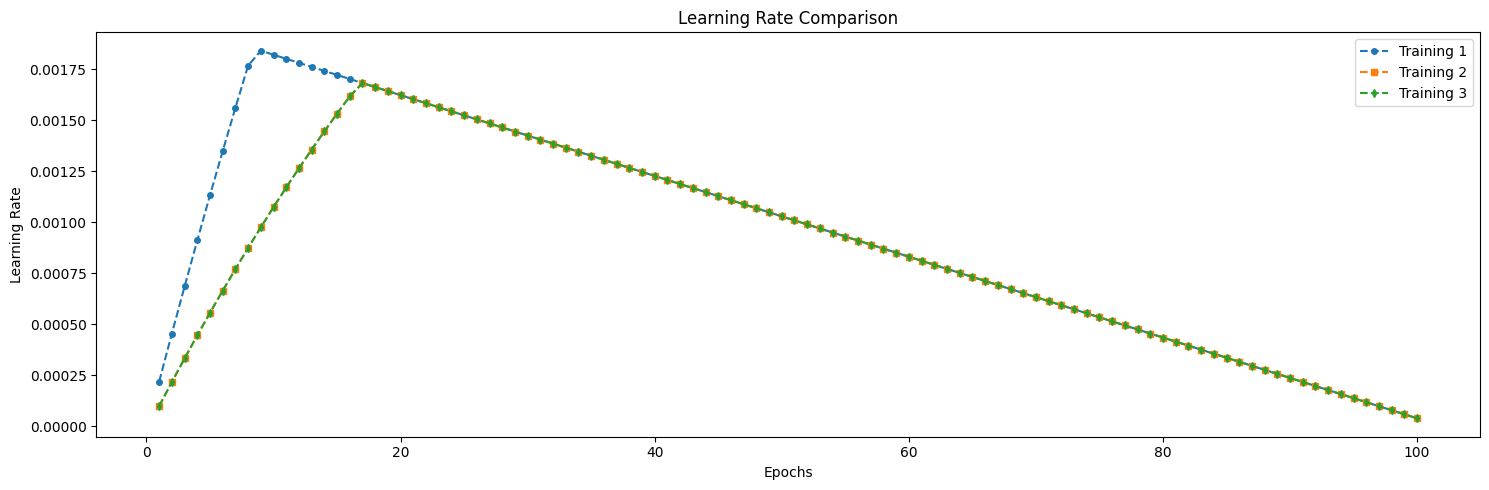

In [42]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experiment | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | Train Time (min) | Inf Time (ms) | Total detections | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|---------------|--------|
| **1º TRAIN** | Small & Mid | 6+4 | 3676 | 16,6k | 60% / 40% | *11.66* | ***1.84*** | 8557 | 27,44% | 24,87% | **47,69%** | ***0.319*** |
| **2º TRAIN** | Small | 4+2 | 2208 | 7,6k | 66,66% / 33,33% | *6.11* | ***1.27*** | 2082 | 24,15% | 26,94% | **48,89%** | ***0.263*** |
| **3º TRAIN** | Mid | 2+2 | 1472 | 9k | 50% / 50% | *6,42* | ***1,29*** | 6477 | 26,86% | 24,22% | **48,91%** | ***0.338*** |

## Comparación de los Entrenamientos y Conclusiones

### **Análisis del Dataset**
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### **Análisis de los Hiperparámetros**
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  
- El **learning rate** tuvo un comportamiento caótico, dificultando el aprendizaje del modelo.

### **Análisis de Resultados**
#### **Métricas Generales**
1. **Precisión (Precision) y Recall**: Ambas métricas se mantuvieron bajas, indicando que el modelo tiene dificultades para detectar objetos correctamente y minimizar falsos positivos y falsos negativos.

2. **mAP50**: El mAP50 se mantuvo bajo (alrededor de 0.338), lo que confirma el bajo rendimiento general del modelo.
  
3. **Confusión entre clases (False Positives y False Negatives)**: Se observaron altos números de falsos positivos y falsos negativos, lo que sugiere que el modelo tiene dificultades para distinguir entre objetos y el fondo, o entre diferentes clases de objetos (si las hay).

# Conclusión Final
Los resultados obtenidos revelan desafíos significativos en el entrenamiento del modelo YOLOv8n, evidenciados por la ausencia de aprendizaje en las curvas de entrenamiento. Esto sugiere que el modelo, en su configuración actual, no logra converger adecuadamente. Las posibles causas de este problema incluyen un learning rate inestable, estrategias de aumento de datos insuficientes y la limitación inherente al tamaño del modelo en relación con la complejidad del dataset.

Para abordar estas deficiencias, se recomienda una revisión exhaustiva y un ajuste de los hiperparámetros, prestando especial atención al learning rate y su programación, así como a la implementación de técnicas de aumento de datos más robustas. Asimismo, se sugiere evaluar la viabilidad de utilizar modelos YOLOv8 de mayor capacidad, como YOLOv8s o YOLOv8m, para determinar si pueden ofrecer un mejor rendimiento en este contexto.

Finalmente, es crucial realizar una evaluación crítica de la calidad del dataset, tanto en términos de cantidad como de precisión en el etiquetado, para asegurar que proporcione una base sólida para el entrenamiento del modelo. La mejora en estos aspectos podría conducir a una convergencia más efectiva y a un rendimiento superior del modelo en la tarea de detección de objetos.

## Estrategias para Próximos Entrenamientos
1. **Dataset**
- Aumentar la cantidad de datos de entrenamiento: Si es posible, obtener más datos de entrenamiento para mejorar la generalización del modelo.
- Aumentar la intensidad de las augmentaciones, incluyendo técnicas como Mosaic y MixUp.
- Añadir augmentaciones espaciales (rotaciones, recortes, traslaciones) y de color (hue, saturation, value).
- Revisar la calidad de los datos: Verificar si los datos de entrenamiento están limpios y correctamente etiquetados.

2. **Hiperparámetros**
- Aumentar el tiempo de entrenamiento: Si es posible, entrenar el modelo por más epocas.
- Descongelamiento Progresivo de Capas (Layer Unfreezing): Descongelar gradualmente las capas del modelo durante el entrenamiento.
- Experimentar con diferentes batch sizes.
-  Ajuste del Learning Rate:
    - Experimentar con diferentes esquemas de programación del LR o con un LR constante más bajo.
    - Implementar un learning rate scheduler (por ejemplo, CosineAnnealingLR o ReduceLROnPlateau).
    - Realizar un learning rate range test para encontrar un valor óptimo.
- Experimentar con diferentes IOU threshold.

3. **Optimización del Modelo**
- Experimentar con YOLOv8s o YOLOv8m si el dataset lo justifica.
- Aumentar la complejidad del modelo: Si el modelo utilizado es muy simple, probar con un modelo más complejo que pueda capturar mejor los patrones de los datos.

4. **Evaluación y Métricas**
- Aumentar la cantidad de datos de validación: Aumentar la cantidad de datos de validación, puede ayudar a obtener métricas mas estables.